# Latar Belakang

Komisi Taksi dan Limusin Kota New York (TLC), yang dibentuk pada tahun 1971, adalah badan 
yang bertanggung jawab untuk memberikan izin dan mengatur taksi Medallion (Kuning) Kota New York, taksi sewaan 
kendaraan (liveries berbasis komunitas, mobil hitam dan limusin mewah), van komuter, dan 
kendaraan paratransit. Dewan Komisi terdiri dari sembilan anggota, delapan di antaranya adalah 
Komisaris yang tidak digaji. Ketua/Komisaris yang digaji memimpin rapat rutin 
secara teratur memimpin rapat komisi publik yang dijadwalkan dan merupakan kepala badan, yang membawahi 
staf sekitar 600 karyawan TLC.
Lebih dari 200.000 pemegang lisensi TLC menyelesaikan sekitar 1.000.000 perjalanan setiap harinya. Untuk beroperasi untuk 
Untuk beroperasi, pengemudi harus terlebih dahulu menjalani pemeriksaan latar belakang, memiliki catatan mengemudi yang aman, dan 
menyelesaikan pelatihan pengemudi selama 24 jam. Kendaraan berlisensi TLC diperiksa untuk keselamatan dan emisi di Fasilitas Inspeksi Woodside TLC.

Sumber penjelasan latar belakang dapat diakses [di sini](https://www.kaggle.com/datasets/shuhengmo/uber-nyc-forhire-vehicles-trip-data-2021). 

# Pernyataan Masalah

Ingin membandingkan 2 VendorID apakah salah satu VendorId tersebut kurang baik, berdasarkan yaitu:

    1. Passenger_count, 

    2. Trip_distance 

    3. Total_amount

Siapakah VendorID yang kurang performanya?

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data New York City TLC Trip Record Data Dictionary.

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait New York City TLC Trip Record Data Dictionary. Ada 17 kolom di dalam dataset, yaitu:  

* VendorID : Kode yang menunjukkan penyedia LPEP yang menyediakan catatan.

    1 = Creative Mobile Technologies, LLC. 

    2 = VeriFone Inc.

* lpep_pickup_datetime: Tanggal dan waktu ketika meteran diaktifkan.
* lpep_dropoff_datetime : Tanggal dan waktu ketika meteran dilepaskan.
* Passenger_count: Jumlah penumpang di dalam kendaraan. Ini adalah nilai yang dimasukkan oleh pengemudi.
* Trip_distance: Jarak perjalanan yang telah dilalui dalam mil dilaporkan oleh taksimeter.
* PULocationID: Zona Taksi TLC di mana taksimeter digunakan.
* DOLocationID: Zona Taksi TLC di mana taksimeter dilepaskan.
* RateCodeID : Kode tarif akhir berlaku di akhir perjalanan.

    1 = Tarif standar

    2 =JFK

    3 =Newark

    4 =Nassau atau Westchester 5 =Tarif yang dinegosiasikan

    6 =Tumpangan kelompok

* Store_and_fwd_flag: Bendera ini menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor, alias "simpan dan teruskan," karena kendaraan tidak memiliki koneksi ke server.

    Y = perjalanan simpan dan teruskan

    N = bukan perjalanan simpan dan teruskan

* Payment_type: Kode numerik yang menandakan bagaimana penumpang membayar perjalanan.

    1 = Kartu kredit 

    2 = Tunai

    3 = Tanpa biaya 

    4 = Sengketa

    5 = Tidak diketahui 

    6 = Perjalanan dibatalkan

* Fare_amount : Tarif waktu dan jarak dihitung berdasarkan argo. Biaya tambahan dan biaya tambahan lainnya. Saat ini, tarif ini hanya mencakup biaya jam sibuk dan biaya semalam sebesar $0,50 dan $1.
* MTA_tax: Pajak MTA sebesar $0,50 yang secara otomatis dipicu berdasarkan tarif meteran yang digunakan.
* Improvement_surcharge: Biaya tambahan perbaikan $ 0,30 dinilai pada perjalanan yang dielu-elukan di bendera
penurunan. Biaya tambahan perbaikan mulai dikenakan pada tahun 2015.
* Tip_amount: Kolom ini secara otomatis terisi untuk tip kartu kredit. Tip tunai tidak termasuk. 
* Tolls_amount: Jumlah total semua tol yang dibayarkan dalam perjalanan. 
* Total_amount: The total amount charged to passengers. Does not include cash tips.  
* Trip_type: Kode yang menunjukkan apakah perjalanan tersebut merupakan hujan es di jalan atau pengiriman yang secara otomatis ditetapkan berdasarkan tarif meteran yang digunakan, namun dapat diubah oleh pengemudi.

    1 = Panggil langsung dengan melabaikan tangan 
    
    2 = Pesan online 

In [203]:
df=pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## Data Understanding and Cleaning
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umur dari dataset New York City TLC Trip Record Data Dictionary.

In [204]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (68211, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14

In [205]:
display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [206]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

# Missing Value

In [207]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

VendorID                 0.000000  
lpep_pickup_datetime     0.000000  
lpep_dropoff_datetime    0.000000  
store_and_fwd_flag       6.339154  
RatecodeID               6.339154  
PULocationID             0.000000  
DOLocationID             0.000000  
passenger_count          6.339154  
trip_distance            0.000000  
fare_amount              0.000000  
extra                    0.000000  
mta_tax                  0.000000  
tip_amount               0.000000  
tolls_amount             0.000000  
ehail_fee                100.000000
improvement_surcharge    0.000000  
total_amount             0.000000  
payment_type             6.339154  
trip_type                6.353814  
congestion_surcharge     6.339154  
dtype: float64

Secara garis besar:  
* *missing value* di kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type` dan `trip_type` memiliki proporsi yang cukup rendah (<10%), dengan missing value di kolom `ehail_fee` mencapai 100.00%.


Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan dalam kasus kita, karena jumlah missing value yang tergolong cukup tinggi (sampai 100%).
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Kita sudah melihat gambaran kasar anomali di dalam data kita, sekarang, mari kita lihat dan tangani tiap-tiap anomali secara lebih jauh.  


Sebelum mulai marilah kita melihat outlier dari dataset New York City TLC Trip Record Data Dictionary.

# 1. Cleanning Data

In [208]:
numericals = ['total_amount', 'trip_distance', 'passenger_count']

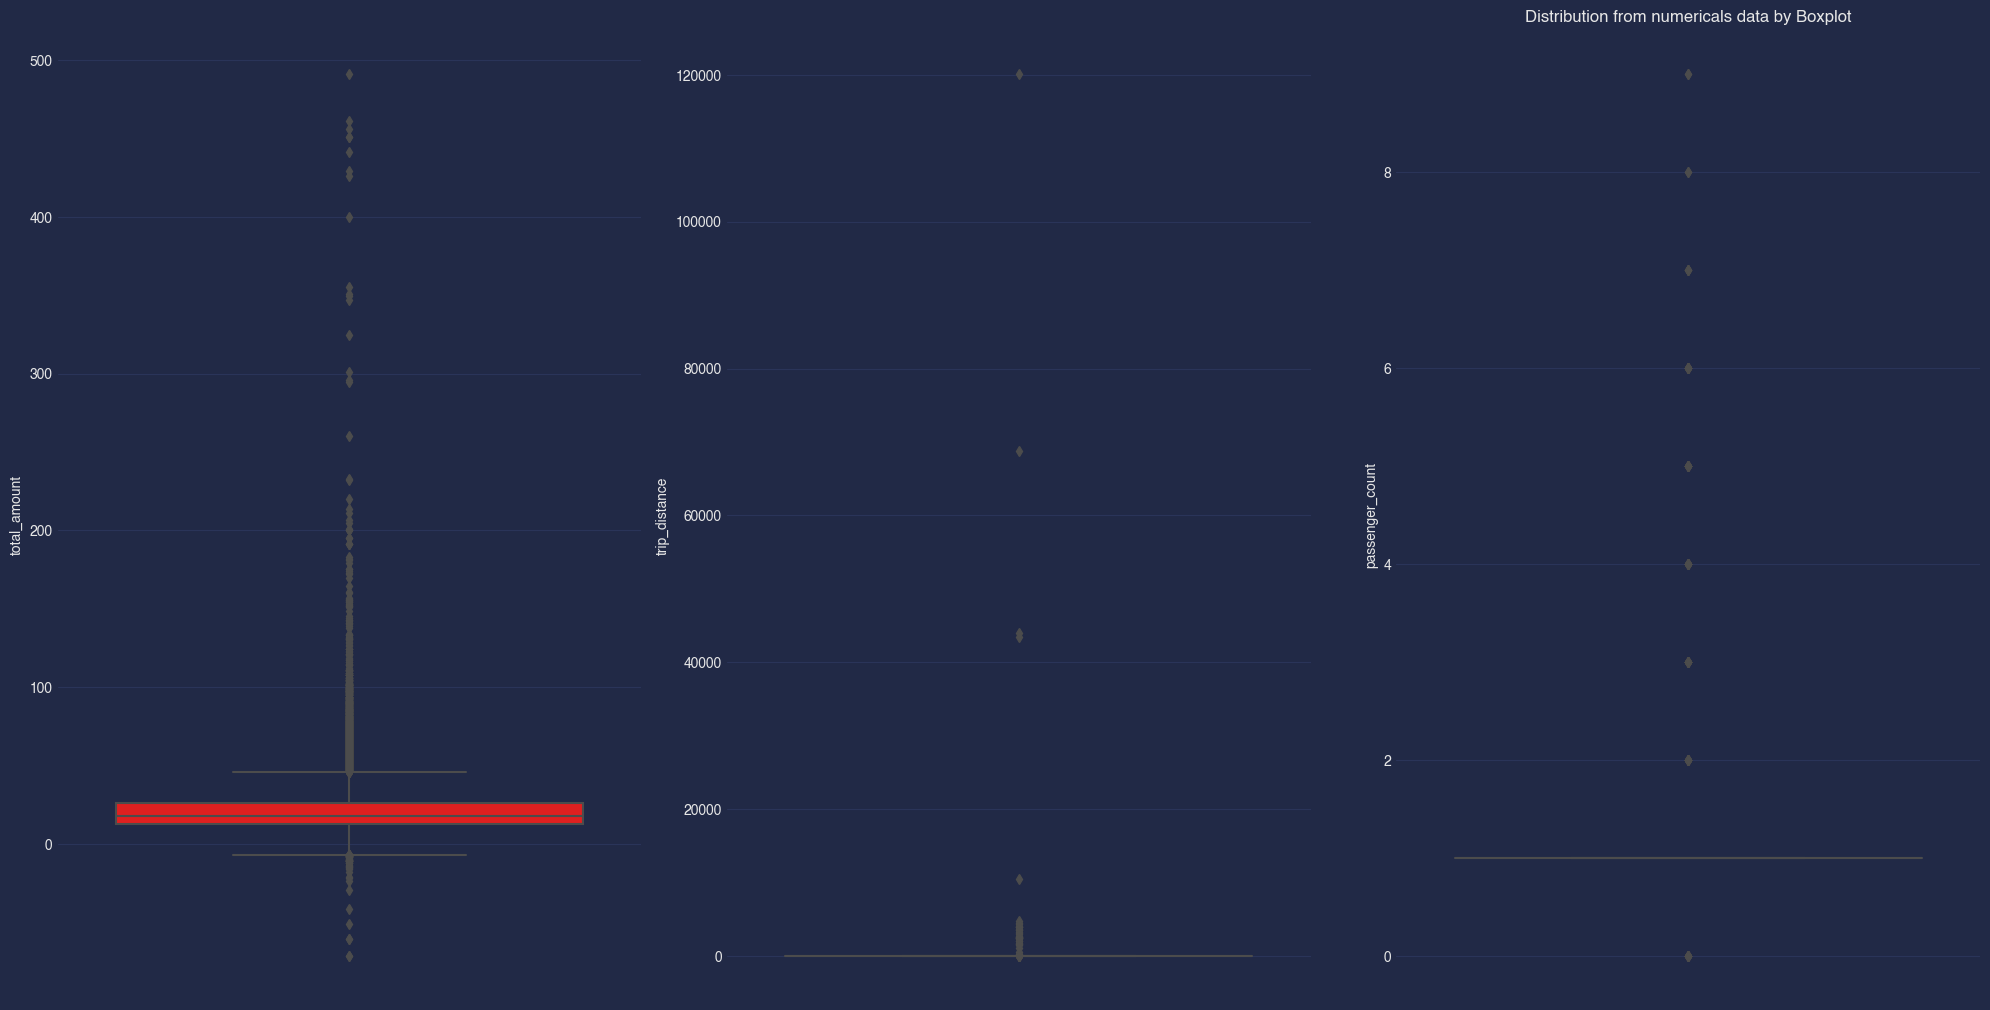

In [209]:
features = numericals
plt.figure(figsize=(20,10))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color = 'red', orient = 'v')
    plt.tight_layout()
plt.title('Distribution from numericals data by Boxplot')

plt.show()

### 1.a Menghapus data pada kolom "ehail_fee"

Dari kolom 'ehail_fee' harus dihapus (drop) karena terdapat missing value, yaitu 100%.

In [210]:
# drop/hapus pada colom "ehail_fee" (karena data kosong 100% dan tidak ada dalam dict)
df.drop('ehail_fee', axis=1, inplace=True)

In [211]:
# persentase missing value di tiap kolom (setelah dilakukan drop data "ehail_fee")
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             4324
trip_type                4334
congestion_surcharge     4324
dtype: int64

### 1.b Menghapus data pada kolom "congestion_surcharge"

Dari kolom 'congestion_surcharge' dihapus dikarena data tidak ada sangkutpaut dengan yang lain dan data nya juga tidak ada di New York City TLC Trip Record Data Dictionary.

In [212]:
df.drop('congestion_surcharge', axis=1, inplace=True)

In [213]:
# persentase missing value di tiap kolom (setelah dilakukan drop data "congestion_surcharge")
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
extra                    0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             4324
trip_type                4334
dtype: int64

### 1.c Menghapus data pada kolom "extra"

Sama seperti, 'congestion_surcharge' data 'extra' tidak ada sangkutpaut dengan yang lain dan data nya juga tidak ada di New York City TLC Trip Record Data Dictionary.

In [214]:
df.drop('extra', axis=1, inplace=True)

In [215]:
# persentase missing value di tiap kolom (setelah dilakukan drop data "extra")
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             4324
trip_type                4334
dtype: int64

### 1.d Mengisi data kosong "payment_type"

Untuk mengisi missing value payment_type kita perlu mencari nilai tengah (median) dan mengisi nilai tersebut.

In [216]:
# isi data yang kosong (kategorikal 'payment_type)
# 5.0 adalah Unknown

fill_payment_type = df['payment_type'].fillna(5.0, inplace=True)

In [217]:
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       4324
RatecodeID               4324
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             0   
trip_type                4334
dtype: int64

### 1.e Mengisi data kosong "store_and_fwd_flag"

Dari kolom 'store_and_fwd_flag_mode' harus membuat fungsi nilai terbanyak yang sering muncul (mode) unutuk mengisi missing value

In [218]:
store_and_fwd_flag_mode = df[['store_and_fwd_flag']].mode()
store_and_fwd_flag_mode

,store_and_fwd_flag
0,N


Dari kolom 'store_and_fwd_flag' kita bisa mengubah tipe data dengan tipe (float)

In [219]:
# Buat fungsi lambda untuk konversi
convert_flag = lambda x: 1 if x == 'Y' else 0

# Terapkan fungsi lambda pada kolom 'store_and_fwd_flag'
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].apply(convert_flag)

# Ubah tipe data kolom menjadi float
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype(float)

# Tampilkan DataFrame
print(df)

       VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
0      2         2023-01-01 00:26:10  2023-01-01 00:37:11    
1      2         2023-01-01 00:51:03  2023-01-01 00:57:49    
2      2         2023-01-01 00:35:12  2023-01-01 00:41:32    
3      1         2023-01-01 00:13:14  2023-01-01 00:19:03    
4      1         2023-01-01 00:33:04  2023-01-01 00:39:02    
...   ..                         ...                  ...    
68206  2         2023-01-31 22:29:00  2023-01-31 22:42:00    
68207  2         2023-01-31 22:40:00  2023-01-31 22:48:00    
68208  2         2023-01-31 23:46:00  2023-02-01 00:02:00    
68209  2         2023-01-31 23:01:00  2023-01-31 23:19:00    
68210  2         2023-01-31 23:51:00  2023-02-01 00:07:00    

       store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
0      0.0                 1.0         166           143            
1      0.0                 1.0         24            43             
2      0.0                 1.0         223      

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     68211 non-null  float64
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  mta_tax                68211 non-null  float64
 11  tip_amount             68211 non-null  float64
 12  tolls_amount           68211 non-null  float64
 13  improvement_surcharge  68211 non-null  float64
 14  total_amount           68211 non-null  float64
 15  pa

Kemudian, kembali dilakukan (mode) setelah dilakukan pengubahan tipe data float.

In [221]:
store_and_fwd_flag_mode = df[['store_and_fwd_flag']].mode()
store_and_fwd_flag_mode

,store_and_fwd_flag
0,0.0


Setelah ditemukan niai tengah nya, kemudian dilakukan pengisian missing value tersebut.

In [222]:
df[['store_and_fwd_flag']].fillna(store_and_fwd_flag_mode, inplace=True)

In [223]:
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       0   
RatecodeID               4324
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             0   
trip_type                4334
dtype: int64

### 1.f Mengisi data kosong "RatecodeID"

Untuk mengisi missing value RatecodeID kita perlu mencari nilai tengah (median) dan mengisi nilai tersebut.

In [224]:
RatecodeID_median = df['RatecodeID'].median()
RatecodeID_median

1.0

Setelah itu melakukan pengisian missing value berdasarkan hasil (median) dari RatecodeID.

In [225]:
df['RatecodeID'].fillna(RatecodeID_median, inplace=True)

In [226]:
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       0   
RatecodeID               0   
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             0   
trip_type                4334
dtype: int64

### 1.g Mengisi data kosong "trip_type"

Untuk mengisi missing value trip_type kita perlu mencari nilai tengah (median) dan mengisi nilai tersebut.

In [227]:
trip_type_median = df['trip_type'].median()
trip_type_median

1.0

Setelah itu melakukan pengisian missing value berdasarkan hasil (median) dari trip_type_median.

In [228]:
df['trip_type'].fillna(trip_type_median, inplace=True)

In [229]:
df.isna().sum()

VendorID                 0   
lpep_pickup_datetime     0   
lpep_dropoff_datetime    0   
store_and_fwd_flag       0   
RatecodeID               0   
PULocationID             0   
DOLocationID             0   
passenger_count          4324
trip_distance            0   
fare_amount              0   
mta_tax                  0   
tip_amount               0   
tolls_amount             0   
improvement_surcharge    0   
total_amount             0   
payment_type             0   
trip_type                0   
dtype: int64

### 1.h Mengisi data kosong "passenger_count"

Data passenger_count sebaiknya untuk mencari nilai tengahnya kita mengisi datanya dengan median.

In [230]:
passenger_count_median = df['passenger_count'].median()
passenger_count_median

1.0

Setelah itu melakukan pengisian missing value berdasarkan hasil (median) dari passenger_count.

In [231]:
df['passenger_count'].fillna(passenger_count_median, inplace=True)

In [232]:
df.isna().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
dtype: int64

In [233]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,0.5,4.03,0.0,1.0,24.18,1.0,1.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,0.5,2.64,0.0,1.0,15.84,1.0,1.0
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,0.0,1.0,223,179,1.0,0.00,7.20,0.5,1.94,0.0,1.0,11.64,1.0,1.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,1.5,1.70,0.0,1.0,10.20,1.0,1.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,1.5,0.00,0.0,1.0,8.00,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,0.0,1.0,49,62,1.0,4070.82,15.70,0.0,0.00,0.0,1.0,16.70,5.0,1.0
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,0.0,0.00,0.0,1.0,5.41,5.0,1.0
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,0.0,3.51,0.0,1.0,21.04,5.0,1.0
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,0.0,3.20,0.0,1.0,19.18,5.0,1.0


Data di drop karena ditemukan anomali lebih dari 1000 mil (trip_distance)

In [234]:
df.drop(df.index[df['trip_distance'] > 1000], inplace=True)

Data di drop karena ditemukan anomali kurang dari 1 mil (trip_distance)

In [235]:
df.drop(df.index[df['trip_distance'] < 1 ], inplace=True)

Data di drop karena ditemukan anomali kurang dari 1 (total_amount)

In [236]:
df.drop(df.index[df['total_amount'] < 1 ], inplace=True)

Harga mulai taksi dari 'total_amount' di kota New York adalah 4.440 USD 

Dataset dapat diakses [di sini](http://hikersbay.com/prices/usa/newyork/harga-di-kota-new-york.html?lang=id). 

In [237]:
counts = df[df['trip_distance'] < 1]['trip_distance'].value_counts()
drop_indices = counts[counts > 5].index
df.drop(df.index[(df['trip_distance'] < 1) & (df['total_amount'] > 4.40) & (df['trip_distance'].isin(drop_indices))], inplace=True)

In [238]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,0.5,4.03,0.0,1.0,24.18,1.0,1.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,0.5,2.64,0.0,1.0,15.84,1.0,1.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,1.5,1.70,0.0,1.0,10.20,1.0,1.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,1.5,0.00,0.0,1.0,8.00,1.0,1.0
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,0.0,1.0,41,262,1.0,2.78,17.70,0.5,0.00,0.0,1.0,22.95,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,0.0,1.25,0.0,0.3,25.02,5.0,1.0
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,0.0,0.00,0.0,1.0,5.41,5.0,1.0
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,0.0,3.51,0.0,1.0,21.04,5.0,1.0
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,0.0,3.20,0.0,1.0,19.18,5.0,1.0


In [239]:
df[df['trip_distance'].between(50,1000)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
7322,2,2023-01-05 09:00:03,2023-01-05 15:18:38,0.0,5.0,134,134,1.0,66.18,15.00,0.0,0.00,0.00,1.0,18.75,2.0,1.0
43013,2,2023-01-22 10:39:49,2023-01-22 11:48:18,0.0,1.0,82,265,1.0,57.09,205.30,0.5,0.00,0.00,1.0,206.80,2.0,1.0
48770,2,2023-01-24 22:56:13,2023-01-25 19:43:58,0.0,5.0,179,264,4.0,53.72,0.01,0.0,0.00,0.00,1.0,3.76,2.0,1.0
63995,2,2023-01-01 12:35:00,2023-01-01 12:58:00,0.0,1.0,181,137,1.0,579.63,28.49,0.0,4.84,0.00,1.0,37.08,5.0,1.0
64695,2,2023-01-06 14:16:00,2023-01-06 14:59:00,0.0,1.0,82,130,1.0,137.95,44.90,0.0,4.04,0.00,1.0,49.94,5.0,1.0
66580,2,2023-01-20 09:16:00,2023-01-20 09:59:00,0.0,1.0,133,90,1.0,254.65,45.44,0.0,0.00,6.55,1.0,55.74,5.0,1.0


Data trip_distance di drop karena terdapat anomali pada value 579.63

In [240]:
df.drop(df.index[df['trip_distance'] ==  579.63], inplace=True)

Setelah itu mengecek anomali 'trip_distance' antara 50 sampai 1000.

In [241]:
df[df['trip_distance'].between(50,1000)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
7322,2,2023-01-05 09:00:03,2023-01-05 15:18:38,0.0,5.0,134,134,1.0,66.18,15.00,0.0,0.00,0.00,1.0,18.75,2.0,1.0
43013,2,2023-01-22 10:39:49,2023-01-22 11:48:18,0.0,1.0,82,265,1.0,57.09,205.30,0.5,0.00,0.00,1.0,206.80,2.0,1.0
48770,2,2023-01-24 22:56:13,2023-01-25 19:43:58,0.0,5.0,179,264,4.0,53.72,0.01,0.0,0.00,0.00,1.0,3.76,2.0,1.0
64695,2,2023-01-06 14:16:00,2023-01-06 14:59:00,0.0,1.0,82,130,1.0,137.95,44.90,0.0,4.04,0.00,1.0,49.94,5.0,1.0
66580,2,2023-01-20 09:16:00,2023-01-20 09:59:00,0.0,1.0,133,90,1.0,254.65,45.44,0.0,0.00,6.55,1.0,55.74,5.0,1.0


Kemudian mengecek kembali anomali dari 'fare_amount' antara 200 sampai 1000

In [242]:
df[df['fare_amount'].between(200,1000)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
556,2,2023-01-01 13:07:46,2023-01-01 19:45:18,0.0,1.0,223,8,1.0,16.00,292.8,0.5,0.0,0.0,1.0,294.3,2.0,1.0
2014,2,2023-01-02 15:36:45,2023-01-02 20:44:45,0.0,1.0,223,223,1.0,2.35,218.6,0.5,0.0,0.0,1.0,220.1,2.0,1.0
7731,2,2023-01-05 12:12:49,2023-01-05 19:53:49,0.0,1.0,223,223,1.0,25.48,348.1,0.5,0.0,0.0,1.0,349.6,2.0,1.0
12615,2,2023-01-07 15:55:53,2023-01-07 20:38:53,0.0,1.0,223,223,1.0,20.43,230.5,0.5,0.0,0.0,1.0,232.0,2.0,1.0
25518,2,2023-01-13 16:51:53,2023-01-13 18:37:48,0.0,4.0,265,92,2.0,38.24,322.2,0.0,0.0,21.3,1.0,347.0,2.0,1.0
33098,2,2023-01-17 16:59:25,2023-01-17 18:23:13,0.0,4.0,28,265,2.0,36.40,206.7,0.5,3.0,0.0,1.0,213.7,1.0,1.0
42882,2,2023-01-22 05:14:42,2023-01-22 06:15:40,0.0,4.0,112,265,2.0,35.39,208.8,0.5,0.0,0.0,1.0,211.3,2.0,1.0
43013,2,2023-01-22 10:39:49,2023-01-22 11:48:18,0.0,1.0,82,265,1.0,57.09,205.3,0.5,0.0,0.0,1.0,206.8,2.0,1.0
44927,2,2023-01-23 10:28:05,2023-01-23 11:33:51,0.0,4.0,95,265,1.0,47.25,322.9,0.5,0.0,0.0,1.0,324.4,2.0,1.0
50437,2,2023-01-25 17:24:38,2023-01-25 19:16:52,0.0,4.0,82,265,5.0,46.29,292.1,0.5,0.0,0.0,1.0,296.1,2.0,1.0


Setelah itu mengecek lagi value 'trip_distance' yang lebih dari 20 dan value 'total_amount' kurang dari 5.

In [243]:
df[(df['trip_distance'] > 20) & (df['total_amount'] < 5)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
36901,2,2023-01-19 13:49:39,2023-01-19 14:40:05,0.0,1.0,43,23,1.0,24.14,0.00,0.5,0.0,0.0,1.0,4.25,2.0,1.0
48770,2,2023-01-24 22:56:13,2023-01-25 19:43:58,0.0,5.0,179,264,4.0,53.72,0.01,0.0,0.0,0.0,1.0,3.76,2.0,1.0


data total_amount yang value nya 3.76 di drop karena terdapat anomali.

In [244]:
df.drop(df.index[df['total_amount'] ==  3.76], inplace=True)

Kemudian dicek lagi 'trip_distance' yang lebih dari 20 dan 'total_amount' yang lebih dari 4.40

In [245]:
df[(df['trip_distance'] > 20) & (df['total_amount'] > 4.40)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
476,2,2023-01-01 11:10:46,2023-01-01 11:52:44,0.0,2.0,41,132,1.0,20.55,70.00,0.5,19.51,6.55,1.0,97.56,1.0,1.0
577,2,2023-01-01 13:45:29,2023-01-01 14:25:06,0.0,1.0,66,132,2.0,27.61,101.00,0.5,8.88,0.00,1.0,111.38,1.0,1.0
691,2,2023-01-01 14:59:35,2023-01-01 15:57:23,0.0,1.0,55,138,1.0,23.58,94.00,0.5,20.10,0.00,1.0,120.60,1.0,1.0
1445,2,2023-01-02 08:57:41,2023-01-02 09:39:53,0.0,3.0,166,1,3.0,26.94,121.70,0.0,33.94,13.75,0.3,169.69,1.0,1.0
1557,2,2023-01-02 10:38:43,2023-01-02 11:04:43,0.0,1.0,65,132,1.0,20.56,75.80,0.5,15.46,0.00,1.0,92.76,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67243,2,2023-01-25 04:25:00,2023-01-25 05:01:00,0.0,1.0,243,132,1.0,21.03,76.76,0.0,17.01,6.55,0.3,100.62,5.0,1.0
67317,2,2023-01-25 12:46:00,2023-01-25 12:59:00,0.0,1.0,244,166,1.0,27.45,17.05,0.0,3.61,0.00,1.0,21.66,5.0,1.0
67733,2,2023-01-28 07:39:00,2023-01-28 08:30:00,0.0,1.0,89,265,1.0,21.87,97.24,0.0,23.51,19.30,1.0,141.05,5.0,1.0
67940,2,2023-01-29 21:41:00,2023-01-29 22:13:00,0.0,1.0,175,265,1.0,21.30,82.19,0.0,17.95,6.55,1.0,107.69,5.0,1.0


Selanjutnya mengecek kembali 'total_amount' antara 4 sampai 1000

In [246]:
df[df['total_amount'].between(4,1000)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,0.5,4.03,0.0,1.0,24.18,1.0,1.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,0.5,2.64,0.0,1.0,15.84,1.0,1.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,1.5,1.70,0.0,1.0,10.20,1.0,1.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,1.5,0.00,0.0,1.0,8.00,1.0,1.0
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,0.0,1.0,41,262,1.0,2.78,17.70,0.5,0.00,0.0,1.0,22.95,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,0.0,1.25,0.0,0.3,25.02,5.0,1.0
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,0.0,0.00,0.0,1.0,5.41,5.0,1.0
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,0.0,3.51,0.0,1.0,21.04,5.0,1.0
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,0.0,3.20,0.0,1.0,19.18,5.0,1.0


Kemudian mengecek kembali value maksimal dari 'total_amount'

In [247]:
df['total_amount'].max()

349.6

Selain itu diperiksa lagi value maksimal dari 'fare_amount'

In [248]:
df['fare_amount'].max()

348.1

Kemudian dicek lagi 'total_amount' yang kurang dari 5

In [249]:
df[df['total_amount'] < 5]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
2945,1,2023-01-03 07:11:50,2023-01-03 07:12:27,0.0,1.0,168,168,1.0,1.60,3.00,1.5,0.00,0.0,1.0,4.50,3.0,1.0
3128,1,2023-01-03 09:10:16,2023-01-03 09:10:18,0.0,1.0,74,74,6.0,6.50,3.00,1.5,0.00,0.0,1.0,4.50,3.0,1.0
5787,1,2023-01-04 14:44:39,2023-01-04 14:44:46,0.0,1.0,244,244,1.0,4.70,3.00,1.5,0.00,0.0,1.0,4.50,2.0,1.0
7517,1,2023-01-05 10:30:34,2023-01-05 10:31:02,0.0,1.0,42,42,1.0,6.40,3.00,1.5,0.00,0.0,1.0,4.50,3.0,1.0
9774,1,2023-01-06 10:09:19,2023-01-06 10:09:33,0.0,1.0,74,74,1.0,5.50,3.00,0.5,0.00,0.0,0.0,3.50,3.0,1.0
9781,1,2023-01-06 10:06:01,2023-01-06 10:06:09,0.0,1.0,212,212,1.0,5.40,3.00,1.5,0.00,0.0,1.0,4.50,2.0,1.0
12377,1,2023-01-07 13:17:42,2023-01-07 13:17:50,0.0,1.0,181,181,1.0,1.60,3.00,1.5,0.00,0.0,1.0,4.50,2.0,1.0
14600,1,2023-01-08 16:07:47,2023-01-08 16:08:17,0.0,1.0,145,145,1.0,3.70,3.00,1.5,0.00,0.0,1.0,4.50,2.0,1.0
14601,1,2023-01-08 16:09:42,2023-01-08 16:09:47,0.0,1.0,145,145,1.0,3.70,3.00,1.5,0.00,0.0,1.0,4.50,2.0,1.0
15985,1,2023-01-09 12:06:57,2023-01-09 12:07:38,0.0,1.0,95,95,1.0,3.30,3.00,1.5,0.00,0.0,1.0,4.50,2.0,1.0


Selanjutnya diperiksa lagi 'trip_distance' yang kurang dari 5

In [250]:
df[df['trip_distance'] < 5]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,0.5,4.03,0.0,1.0,24.18,1.0,1.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,0.5,2.64,0.0,1.0,15.84,1.0,1.0
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,1.5,1.70,0.0,1.0,10.20,1.0,1.0
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,1.5,0.00,0.0,1.0,8.00,1.0,1.0
5,2,2023-01-01 00:53:31,2023-01-01 01:11:04,0.0,1.0,41,262,1.0,2.78,17.70,0.5,0.00,0.0,1.0,22.95,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68204,2,2023-01-31 21:53:00,2023-01-31 22:05:00,0.0,1.0,42,236,1.0,2.26,14.62,0.0,3.31,0.0,1.0,21.68,5.0,1.0
68205,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,0.0,1.25,0.0,0.3,25.02,5.0,1.0
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,0.0,0.00,0.0,1.0,5.41,5.0,1.0
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,0.0,3.51,0.0,1.0,21.04,5.0,1.0


Kemudian dibuat index

In [251]:
x = df.reset_index()
df =  x.drop(columns='index')

Dilakukan drop kolom pada index agar mempermudah mengolah datanya.

In [252]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.9,0.5,4.03,0.0,1.0,24.18,1.0,1.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.7,0.5,2.64,0.0,1.0,15.84,1.0,1.0
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.0,1.5,0.00,0.0,1.0,8.00,1.0,1.0
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,0.0,1.0,41,262,1.0,2.78,17.7,0.5,0.00,0.0,1.0,22.95,2.0,1.0


In [253]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.9,0.5,4.03,0.0,1.0,24.18,1.0,1.0
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.7,0.5,2.64,0.0,1.0,15.84,1.0,1.0
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.5,1.5,1.70,0.0,1.0,10.20,1.0,1.0
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.0,1.5,0.00,0.0,1.0,8.00,1.0,1.0
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,0.0,1.0,41,262,1.0,2.78,17.7,0.5,0.00,0.0,1.0,22.95,2.0,1.0


##### Mengganti type data "lpep_pickup_datetime"

Data lpep_pickup_datetime harus kita ubah type datanya menjadi date time agar kita bisa mendapatkan parameternya untuk dianalis.

In [254]:
df['lpep_pickup_datetime'] = df['lpep_pickup_datetime'].astype('datetime64[ns]')

In [255]:
df['day_of_week'] = df['lpep_pickup_datetime'].dt.day_name()
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,day_of_week
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,0.5,4.03,0.0,1.0,24.18,1.0,1.0,Sunday
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,0.5,2.64,0.0,1.0,15.84,1.0,1.0,Sunday
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,1.5,1.70,0.0,1.0,10.20,1.0,1.0,Sunday
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,1.5,0.00,0.0,1.0,8.00,1.0,1.0,Sunday
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,0.0,1.0,41,262,1.0,2.78,17.70,0.5,0.00,0.0,1.0,22.95,2.0,1.0,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54085,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,0.0,1.25,0.0,0.3,25.02,5.0,1.0,Tuesday
54086,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,0.0,0.00,0.0,1.0,5.41,5.0,1.0,Tuesday
54087,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,0.0,3.51,0.0,1.0,21.04,5.0,1.0,Tuesday
54088,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,0.0,3.20,0.0,1.0,19.18,5.0,1.0,Tuesday


Selanjut mengubah 'lpep_pickup_datetime' tipe data menjadi (hour)

In [256]:
df['hour_of_day'] = df['lpep_pickup_datetime'].dt.hour

In [257]:
# convert the lpep_pickup_datetime column to datetime
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])

# extract the month of the year from the datetime column
df['month_of_year'] = df['lpep_pickup_datetime'].dt.month

print(df.head())

   VendorID lpep_pickup_datetime lpep_dropoff_datetime  store_and_fwd_flag  \
0  2        2023-01-01 00:26:10   2023-01-01 00:37:11   0.0                  
1  2        2023-01-01 00:51:03   2023-01-01 00:57:49   0.0                  
2  1        2023-01-01 00:13:14   2023-01-01 00:19:03   0.0                  
3  1        2023-01-01 00:33:04   2023-01-01 00:39:02   0.0                  
4  2        2023-01-01 00:53:31   2023-01-01 01:11:04   0.0                  

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0  1.0         166           143           1.0              2.58            
1  1.0         24            43            1.0              1.81            
2  1.0         41            238           1.0              1.30            
3  1.0         41            74            1.0              1.10            
4  1.0         41            262           1.0              2.78            

   fare_amount  mta_tax  tip_amount  tolls_amount  improvement_surch

Kemudian mengubah 'lpep_pickup_datetime' menjadi date time (year).

In [258]:
# extract the month of the year from the datetime column
df['year'] = df['lpep_pickup_datetime'].dt.year

##### Mengganti type data "lpep_dropoff_datetime"

Data lpep_dropoff_datetime harus kita ubah type datanya menjadi date time agar kita bisa mendapatkan parameternya untuk dianalis.

In [259]:
df['lpep_dropoff_datetime'] = df['lpep_dropoff_datetime'].astype('datetime64[ns]')

In [260]:
df['day_of_week'] = df['lpep_dropoff_datetime'].dt.day_name()
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,day_of_week,hour_of_day,month_of_year,year
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,...,4.03,0.0,1.0,24.18,1.0,1.0,Sunday,0,1,2023
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,...,2.64,0.0,1.0,15.84,1.0,1.0,Sunday,0,1,2023
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,...,1.70,0.0,1.0,10.20,1.0,1.0,Sunday,0,1,2023
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,...,0.00,0.0,1.0,8.00,1.0,1.0,Sunday,0,1,2023
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,0.0,1.0,41,262,1.0,2.78,17.70,...,0.00,0.0,1.0,22.95,2.0,1.0,Sunday,0,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54085,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,...,1.25,0.0,0.3,25.02,5.0,1.0,Tuesday,21,1,2023
54086,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,...,0.00,0.0,1.0,5.41,5.0,1.0,Tuesday,22,1,2023
54087,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,...,3.51,0.0,1.0,21.04,5.0,1.0,Wednesday,23,1,2023
54088,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,...,3.20,0.0,1.0,19.18,5.0,1.0,Tuesday,23,1,2023


Kemudian mengubah 'lpep_dropoff_datetime' tipe data menjadi date time (hour)

In [261]:
df['hour_of_day'] = df['lpep_dropoff_datetime'].dt.hour

Selanjutnya mengubah 'lpep_dropoff_datetime' tipe data menjadi date time (month)

In [262]:
# convert the lpep_pickup_datetime column to datetime
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

# extract the month of the year from the datetime column
df['month_of_year'] = df['lpep_dropoff_datetime'].dt.month

print(df.head())

   VendorID lpep_pickup_datetime lpep_dropoff_datetime  store_and_fwd_flag  \
0  2        2023-01-01 00:26:10  2023-01-01 00:37:11    0.0                  
1  2        2023-01-01 00:51:03  2023-01-01 00:57:49    0.0                  
2  1        2023-01-01 00:13:14  2023-01-01 00:19:03    0.0                  
3  1        2023-01-01 00:33:04  2023-01-01 00:39:02    0.0                  
4  2        2023-01-01 00:53:31  2023-01-01 01:11:04    0.0                  

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0  1.0         166           143           1.0              2.58            
1  1.0         24            43            1.0              1.81            
2  1.0         41            238           1.0              1.30            
3  1.0         41            74            1.0              1.10            
4  1.0         41            262           1.0              2.78            

   fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge

In [263]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,day_of_week,hour_of_day,month_of_year,year
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,...,4.03,0.0,1.0,24.18,1.0,1.0,Sunday,0,1,2023
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,...,2.64,0.0,1.0,15.84,1.0,1.0,Sunday,0,1,2023
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.50,...,1.70,0.0,1.0,10.20,1.0,1.0,Sunday,0,1,2023
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.00,...,0.00,0.0,1.0,8.00,1.0,1.0,Sunday,0,1,2023
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,0.0,1.0,41,262,1.0,2.78,17.70,...,0.00,0.0,1.0,22.95,2.0,1.0,Sunday,1,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54085,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,...,1.25,0.0,0.3,25.02,5.0,1.0,Tuesday,22,1,2023
54086,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,...,0.00,0.0,1.0,5.41,5.0,1.0,Tuesday,22,1,2023
54087,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,...,3.51,0.0,1.0,21.04,5.0,1.0,Wednesday,0,2,2023
54088,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,...,3.20,0.0,1.0,19.18,5.0,1.0,Tuesday,23,1,2023


Selain itu juga mengubah 'lpep_dropoff_datetime' tipe data menjadi date time (year)

In [264]:
# extract the month of the year from the datetime column
df['year'] = df['lpep_dropoff_datetime'].dt.year


In [265]:
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,day_of_week,hour_of_day,month_of_year,year
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.9,...,4.03,0.0,1.0,24.18,1.0,1.0,Sunday,0,1,2023
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.7,...,2.64,0.0,1.0,15.84,1.0,1.0,Sunday,0,1,2023
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.30,6.5,...,1.70,0.0,1.0,10.20,1.0,1.0,Sunday,0,1,2023
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.10,6.0,...,0.00,0.0,1.0,8.00,1.0,1.0,Sunday,0,1,2023
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,0.0,1.0,41,262,1.0,2.78,17.7,...,0.00,0.0,1.0,22.95,2.0,1.0,Sunday,1,1,2023


Kemudian membuat variable 'df_VendorID_1' & 'df_VendorID_2', agar mudah untuk membandingkan dari mengolah dan menganalisis data.

In [266]:
df_VendorID_1 = df[df['VendorID'] == 1]
df_VendorID_2 = df[df['VendorID'] == 2]

df_VendorID_1

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,day_of_week,hour_of_day,month_of_year,year
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,0.0,1.0,41,238,1.0,1.3,6.5,...,1.70,0.0,1.0,10.20,1.0,1.0,Sunday,0,1,2023
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,0.0,1.0,41,74,1.0,1.1,6.0,...,0.00,0.0,1.0,8.00,1.0,1.0,Sunday,0,1,2023
5,1,2023-01-01 00:09:14,2023-01-01 00:26:39,0.0,1.0,181,45,2.0,3.8,19.1,...,4.85,0.0,1.0,29.20,1.0,1.0,Sunday,0,1,2023
9,1,2023-01-01 00:16:12,2023-01-01 00:41:43,0.0,1.0,255,234,2.0,4.8,26.8,...,0.00,0.0,1.0,32.05,1.0,1.0,Sunday,0,1,2023
14,1,2023-01-01 00:49:34,2023-01-01 01:08:23,0.0,1.0,195,210,1.0,11.3,32.5,...,0.00,0.0,1.0,34.50,2.0,1.0,Sunday,1,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53793,1,2023-01-29 10:01:03,2023-01-29 10:10:54,0.0,1.0,74,166,1.0,2.8,12.8,...,2.86,0.0,1.0,17.16,5.0,1.0,Sunday,10,1,2023
53829,1,2023-01-29 17:00:08,2023-01-29 17:14:38,0.0,1.0,74,142,1.0,3.7,17.7,...,3.29,0.0,1.0,25.24,5.0,1.0,Sunday,17,1,2023
53872,1,2023-01-30 08:37:09,2023-01-30 08:43:47,0.0,1.0,74,41,1.0,1.2,6.5,...,0.80,0.0,1.0,8.80,5.0,1.0,Monday,8,1,2023
53913,1,2023-01-30 12:58:41,2023-01-30 13:19:30,0.0,1.0,74,237,1.0,3.1,15.5,...,2.96,0.0,1.0,22.71,5.0,1.0,Monday,13,1,2023


In [267]:
df_VendorID_2

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,day_of_week,hour_of_day,month_of_year,year
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,0.0,1.0,166,143,1.0,2.58,14.90,...,4.03,0.0,1.0,24.18,1.0,1.0,Sunday,0,1,2023
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,0.0,1.0,24,43,1.0,1.81,10.70,...,2.64,0.0,1.0,15.84,1.0,1.0,Sunday,0,1,2023
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,0.0,1.0,41,262,1.0,2.78,17.70,...,0.00,0.0,1.0,22.95,2.0,1.0,Sunday,1,1,2023
6,2,2023-01-01 00:11:58,2023-01-01 00:24:55,0.0,1.0,24,75,1.0,1.88,14.20,...,0.00,0.0,1.0,16.70,2.0,1.0,Sunday,0,1,2023
7,2,2023-01-01 00:41:29,2023-01-01 00:46:26,0.0,1.0,41,166,2.0,1.11,7.20,...,1.00,0.0,1.0,10.70,1.0,1.0,Sunday,0,1,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54085,2,2023-01-31 21:56:00,2023-01-31 22:14:00,0.0,1.0,75,186,1.0,3.92,20.72,...,1.25,0.0,0.3,25.02,5.0,1.0,Tuesday,22,1,2023
54086,2,2023-01-31 22:40:00,2023-01-31 22:48:00,0.0,1.0,10,205,1.0,2.14,4.41,...,0.00,0.0,1.0,5.41,5.0,1.0,Tuesday,22,1,2023
54087,2,2023-01-31 23:46:00,2023-02-01 00:02:00,0.0,1.0,66,37,1.0,3.44,16.53,...,3.51,0.0,1.0,21.04,5.0,1.0,Wednesday,0,2,2023
54088,2,2023-01-31 23:01:00,2023-01-31 23:19:00,0.0,1.0,225,189,1.0,3.03,14.98,...,3.20,0.0,1.0,19.18,5.0,1.0,Tuesday,23,1,2023


## Data yang sudah bersih
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [268]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(54090, 21)


,dataFeatures,dataType,null,unique,uniqueSample
0,VendorID,int64,0,2,"[1, 2]"
1,lpep_pickup_datetime,datetime64[ns],0,53129,"[2023-01-05T15:42:17.000000000, 2023-01-16T15:23:15.000000000]"
2,lpep_dropoff_datetime,datetime64[ns],0,53085,"[2023-01-19T15:37:10.000000000, 2023-01-10T08:00:58.000000000]"
3,store_and_fwd_flag,float64,0,2,"[1.0, 0.0]"
4,RatecodeID,float64,0,6,"[3.0, 2.0]"
5,PULocationID,int64,0,196,"[236, 89]"
6,DOLocationID,int64,0,246,"[17, 219]"
7,passenger_count,float64,0,8,"[1.0, 0.0]"
8,trip_distance,float64,0,1732,"[8.4, 8.17]"
9,fare_amount,float64,0,2370,"[17.26, 12.87]"


Sebelum dibersihkan, kita memiliki 68,210 baris data, sekarang kita memiliki 54,090  baris. Sekitar 14,120 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

# Data Analysis
Kita sudah melakukan tahap _data cleaning_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **siapakah VendorID yang lebih unggul**.  

Analisis akan dilakukan dengan membandingkan data VendorID. karena dari 54,090 data yang kita miliki, hanya terdapat 2 VendorID, kita perlu berhati-hati dalam membandingkan data VendorID, pembandingan lebih baik dilakukan berdasarkan jumlah dan rata-rata, terutama pada passenger_count, total_amount dan trip_distance.

In [269]:
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

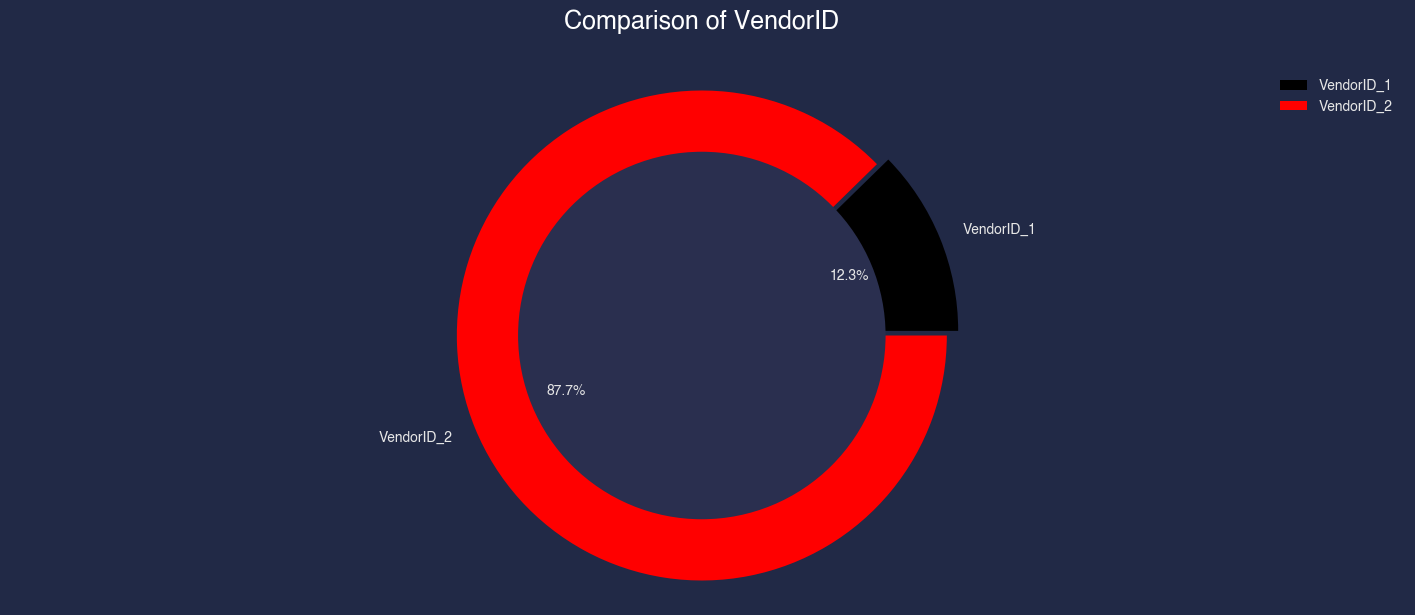

In [270]:
# Count the number of rows for each value in 'VendorID' column for VendorID_1
vendor_count_VendorID_1 = df_VendorID_1['VendorID'].value_counts()

# Count the number of rows for each value in 'VendorID' column for VendorID_2
vendor_count_VendorID_2 = df_VendorID_2['VendorID'].value_counts()

# Combine the counts of VendorID_1 and VendorID_2
combined_counts = pd.concat([vendor_count_VendorID_1, vendor_count_VendorID_2])

# Create labels for the pie chart
labels = ['VendorID_1', 'VendorID_2']

# Create a pie chart
plt.figure(figsize=(18, 7))
plt.pie(combined_counts, labels=labels, autopct='%1.1f%%',explode=[0.050,0.0],colors=['black','red'])
fig=plt.gcf()
center_circle = plt.Circle((0,0),0.75,fc='#2A2F4F')
fig.gca().add_artist(center_circle)

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Comparison of VendorID", 
        ha='center', x=xmin+1.25, y=ymax*1.0, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.legend()
plt.show()


Penjelasan yang dapat diberkan:

    1. Berdasarkan data VendorID_1 dan VendorID_2 jumlahnya lebih banyak VendorID_2, yaitu 87.7%
    2. VendorID_2 memiliki baris 47,423  dengan 21 kolom.
    3. VendorID_1 memiliki baris 6,667 dengan 21 kolom.

Dengan demikian, VendorID_2 lebih banyak dari proporsinya atau jumlahnya dibandingkan dengan VendorID_1 pada dataset ini.

# Vendor 1 Bar Chart

### Top passenger_count of hour_of_day

In [271]:
top_passenger_count_VendorID_1_hour_of_day = df_VendorID_1[["passenger_count", "hour_of_day"]].groupby("hour_of_day").sum().sort_values("hour_of_day", ascending = False).reset_index()
top_passenger_count_VendorID_1_hour_of_day

,hour_of_day,passenger_count
0,23,94.0
1,22,127.0
2,21,216.0
3,20,326.0
4,19,459.0
5,18,556.0
6,17,591.0
7,16,620.0
8,15,631.0
9,14,555.0


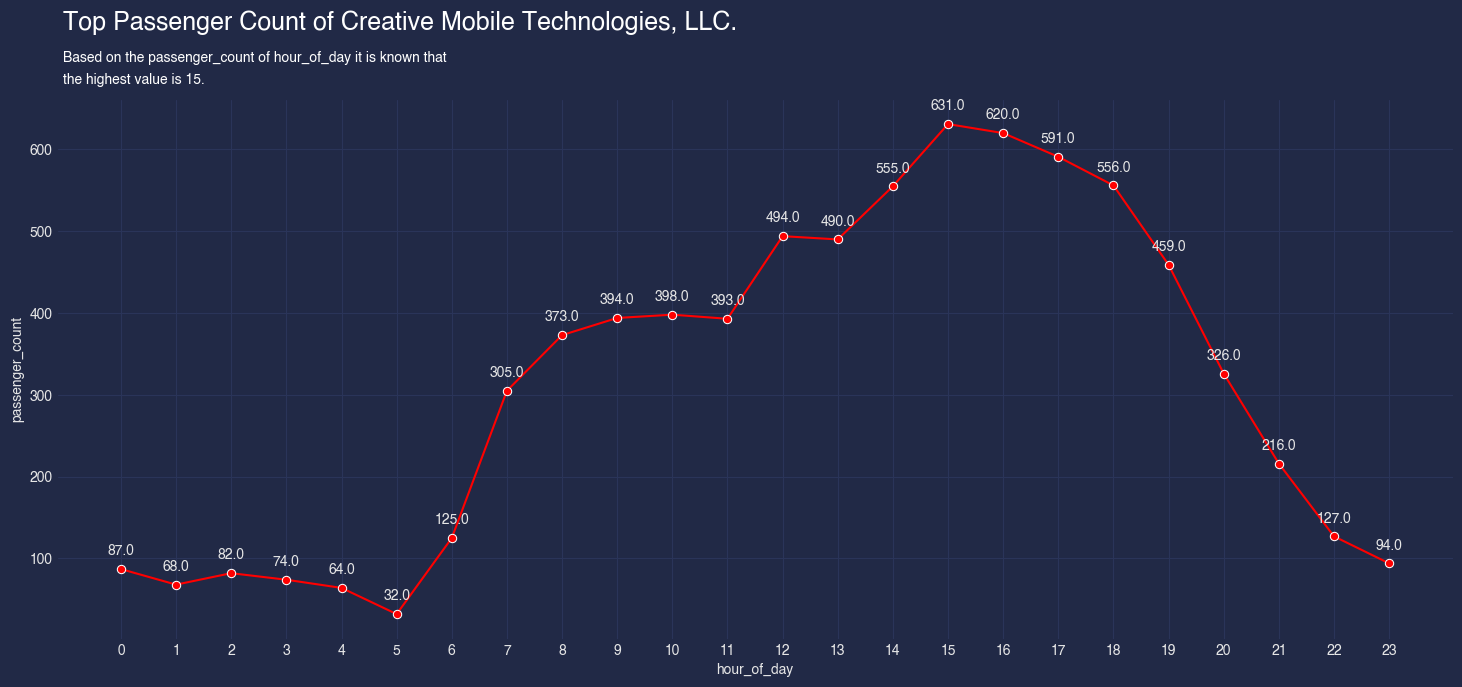

In [272]:
# Your code to generate the dataframe and calculate max_hour

# Plot the line plot using the custom color palette
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='passenger_count', x='hour_of_day', data=top_passenger_count_VendorID_1_hour_of_day, color='red', marker='o')

# Add value labels to the x-axis
ax.set_xticks(top_passenger_count_VendorID_1_hour_of_day['hour_of_day'])
ax.set_xticklabels(top_passenger_count_VendorID_1_hour_of_day['hour_of_day'])

# Add annotations for each data point
for x, y in zip(top_passenger_count_VendorID_1_hour_of_day['hour_of_day'], top_passenger_count_VendorID_1_hour_of_day['passenger_count']):
    ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels for the x-axis and title
plt.xlabel('hour_of_day')
plt.ylabel('passenger_count')

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Top Passenger Count of Creative Mobile Technologies, LLC.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the passenger_count of hour_of_day it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')
plt.text(s="the highest value is 15.", 
        ha='left', x=xmin+0.1, y=ymax*1.03, 
        fontsize=10, fontweight='light', 
        color='white')


# Display the plot
plt.show()


In [273]:
top_passenger_count_VendorID_1_day_of_week = df_VendorID_1[["passenger_count", "day_of_week"]].groupby("day_of_week").sum().sort_values("passenger_count", ascending = False).reset_index()
top_passenger_count_VendorID_1_day_of_week

,day_of_week,passenger_count
0,Tuesday,1245.0
1,Monday,1200.0
2,Thursday,1147.0
3,Wednesday,1059.0
4,Friday,1056.0
5,Sunday,962.0
6,Saturday,885.0


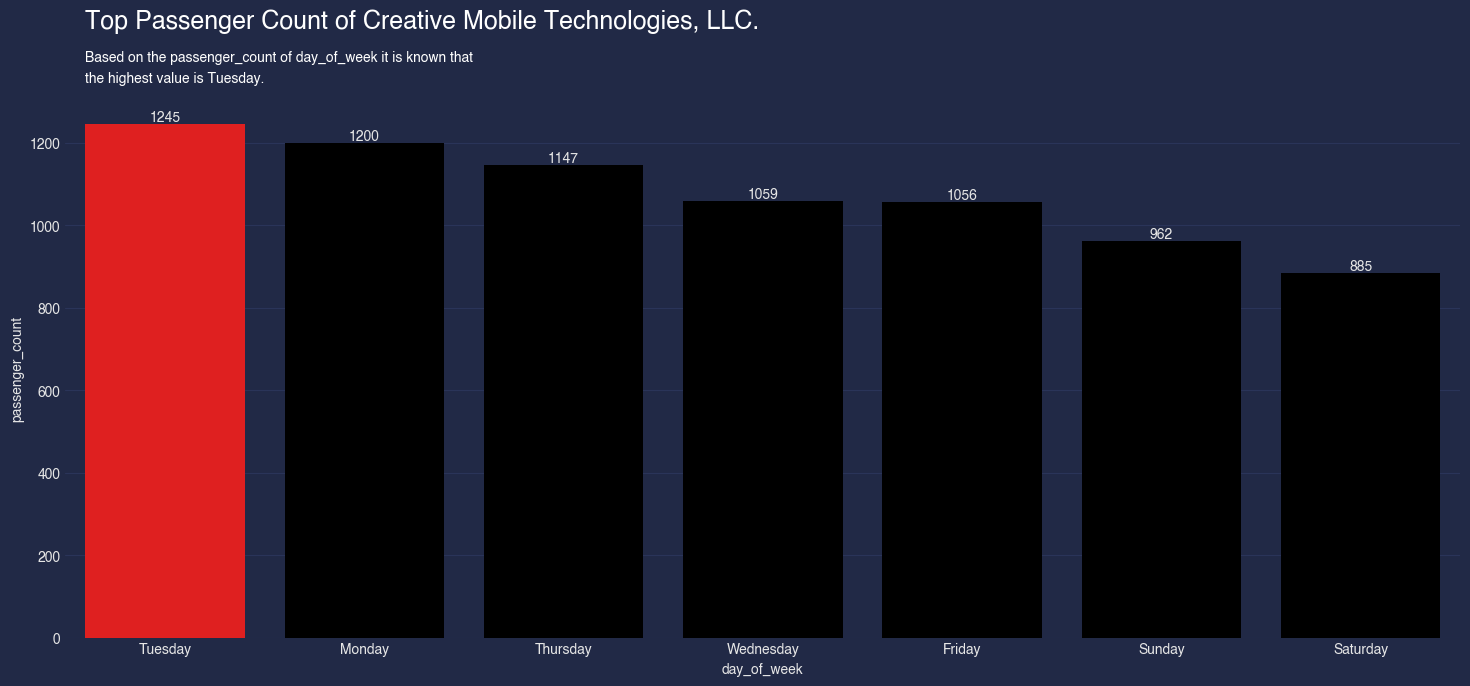

In [274]:
top_passenger_count_VendorID_1_day_of_week = df_VendorID_1[["passenger_count", "day_of_week"]].groupby("day_of_week").sum().sort_values("passenger_count", ascending = False).reset_index()
top_passenger_count_VendorID_1_day_of_week

plt.figure(figsize= (18, 7))
clrs = ['black' if(x<max(top_passenger_count_VendorID_1_day_of_week.passenger_count)) else 'red' for x in top_passenger_count_VendorID_1_day_of_week.passenger_count ]
ax = sns.barplot(y= 'passenger_count',x='day_of_week', data= top_passenger_count_VendorID_1_day_of_week, palette=clrs)
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('passenger_count')

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Top Passenger Count of Creative Mobile Technologies, LLC.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the passenger_count of day_of_week it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')

plt.text(s="the highest value is Tuesday.", 
        ha='left', x=xmin+0.1, y=ymax*1.03, 
        fontsize=10, fontweight='light', 
        color='white')

plt.show()

Penjelasan grafik ini adalah sebagai berikut:

1. Analisis Data:
   - Grafik ini mengambil kolom "passenger_count" dan "day_of_week" dari DataFrame `df_VendorID_1`.
   - Kemudian data dikelompokkan berdasarkan "day_of_week" dan dihitung jumlah penumpang (`passenger_count`) untuk setiap grup.
   - Hasilnya diurutkan secara menurun berdasarkan jumlah penumpang menggunakan `sort_values`.
   - DataFrame hasil analisis tersebut disimpan dalam variabel `top_passenger_count_VendorID_1`.

2. Visualisasi Grafik:
   - Grafik batang digunakan untuk memvisualisasikan hasil analisis data.
   - Ukuran grafik ditentukan dengan `plt.figure(figsize=(18, 7))`, yang mengatur lebar=18 inci dan tinggi=7 inci.
   - Warna batang dalam grafik ditentukan berdasarkan jumlah penumpang.
     - Jika jumlah penumpang suatu hari lebih rendah dari jumlah penumpang maksimum, batang tersebut akan berwarna hitam.
     - Jika jumlah penumpang suatu hari merupakan jumlah penumpang maksimum, batang tersebut akan berwarna merah.
   - Label (nilai dari setiap batang) ditambahkan ke dalam grafik batang menggunakan `ax.bar_label(i,)`, di mana `ax.containers` mengacu pada objek kontainer dalam grafik batang.

3. Informasi yang Disampaikan:
   - Grafik batang ini memberikan informasi tentang jumlah penumpang teratas untuk setiap hari dalam seminggu.
   - Dengan menggunakan warna merah untuk menyoroti hari dengan jumlah penumpang terbanyak, kita dapat dengan mudah mengidentifikasi hari-hari dengan jumlah penumpang yang tinggi.
   - Selain itu, grafik ini juga menunjukkan perbedaan jumlah penumpang antara hari-hari dengan warna batang yang lebih rendah.
   - Judul grafik "Top Passenger Count of Creative Mobile Technologies, LLC." memberikan konteks tentang data yang sedang dianalisis, yaitu jumlah penumpang dari perusahaan Creative Mobile Technologies, LLC.

Dengan menggunakan analisis data dan visualisasi grafik, kita dapat memperoleh pemahaman yang lebih baik tentang pola dan tren jumlah penumpang untuk setiap hari dalam seminggu.

### Top total_amount of hour_of_day

In [275]:
top_total_amount_VendorID_1hour_of_day = df_VendorID_1[["total_amount", "hour_of_day"]].groupby("hour_of_day").sum().sort_values("hour_of_day", ascending = False).reset_index()
top_total_amount_VendorID_1hour_of_day

,hour_of_day,total_amount
0,23,2054.13
1,22,2532.54
2,21,4052.90
3,20,6251.53
4,19,9325.55
5,18,11392.74
6,17,11843.03
7,16,12302.49
8,15,11727.71
9,14,10639.18


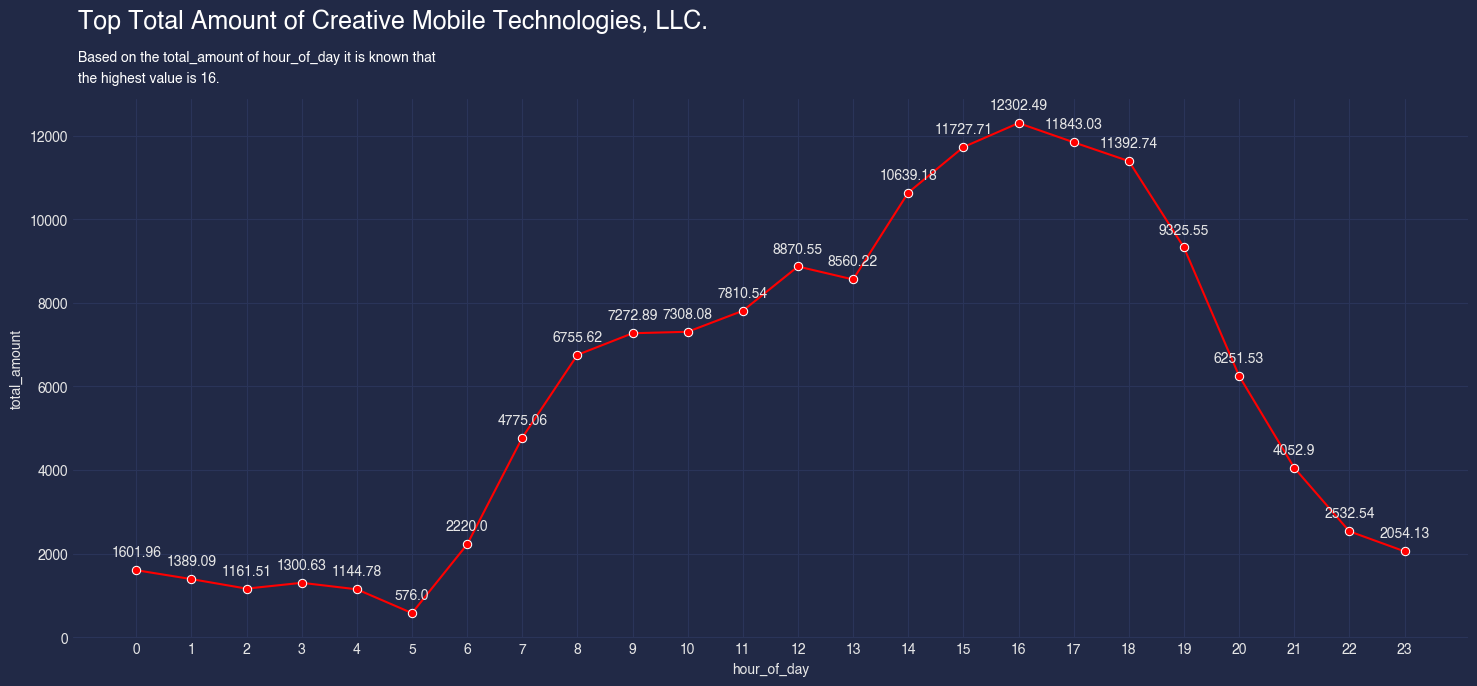

In [276]:
# Your code to generate the dataframe and calculate max_hour

# Plot the line plot using the custom color palette
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='total_amount', x='hour_of_day', data=top_total_amount_VendorID_1hour_of_day, color='red', marker='o')

# Add value labels to the x-axis
ax.set_xticks(top_total_amount_VendorID_1hour_of_day['hour_of_day'])
ax.set_xticklabels(top_total_amount_VendorID_1hour_of_day['hour_of_day'])

# Add annotations for each data point
for x, y in zip(top_total_amount_VendorID_1hour_of_day['hour_of_day'], top_total_amount_VendorID_1hour_of_day['total_amount']):
    ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels for the x-axis and title
plt.xlabel('hour_of_day')
plt.ylabel('total_amount')

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Top Total Amount of Creative Mobile Technologies, LLC.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the total_amount of hour_of_day it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')
plt.text(s="the highest value is 16.", 
        ha='left', x=xmin+0.1, y=ymax*1.03, 
        fontsize=10, fontweight='light', 
        color='white')

# Display the plot
plt.show()


### Top total_amount of day_of_week

In [277]:
top_total_amount_VendorID_1day_of_week = df_VendorID_1[["total_amount", "day_of_week"]].groupby("day_of_week").sum().sort_values("total_amount", ascending = False).reset_index()
top_total_amount_VendorID_1day_of_week

,day_of_week,total_amount
0,Tuesday,24235.76
1,Thursday,22894.44
2,Monday,22185.21
3,Wednesday,20477.72
4,Friday,20016.38
5,Sunday,17149.95
6,Saturday,15909.27


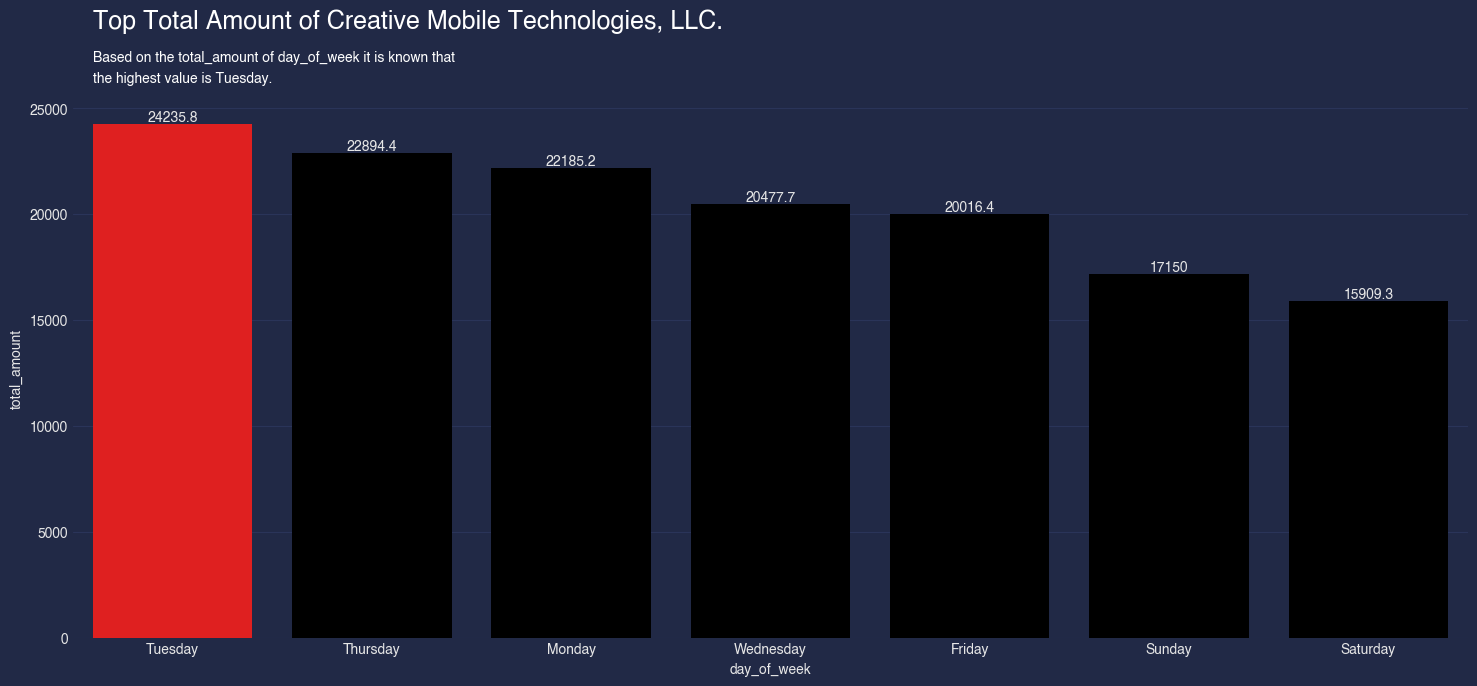

In [278]:
top_total_amount_VendorID_1day_of_week = df_VendorID_1[["total_amount", "day_of_week"]].groupby("day_of_week").sum().sort_values("total_amount", ascending = False).reset_index()
top_total_amount_VendorID_1day_of_week

plt.figure(figsize= (18, 7))
clrs = ['black' if(x<max(top_total_amount_VendorID_1day_of_week.total_amount)) else 'red' for x in top_total_amount_VendorID_1day_of_week.total_amount ]
ax = sns.barplot(y= 'total_amount',x='day_of_week', data= top_total_amount_VendorID_1day_of_week, palette=clrs)
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('total_amount')

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Top Total Amount of Creative Mobile Technologies, LLC.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the total_amount of day_of_week it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')

plt.text(s="the highest value is Tuesday.", 
        ha='left', x=xmin+0.1, y=ymax*1.03, 
        fontsize=10, fontweight='light', 
        color='white')

plt.show()

Penjelasan grafik ini adalah sebagai berikut:

1. Analisis Data:
   - Grafik ini mengambil kolom "total_amount" dan "day_of_week" dari DataFrame `df_VendorID_1`.
   - Kemudian data dikelompokkan berdasarkan "day_of_week" (hari dalam seminggu) dan dilakukan penjumlahan total_amount untuk setiap grup.
   - Hasilnya diurutkan berdasarkan "total_amount" secara menurun menggunakan `sort_values`.
   - DataFrame hasil analisis tersebut disimpan dalam variabel `top_total_amount_VendorID_1`.

2. Visualisasi Grafik:
   - Grafik batang digunakan untuk memvisualisasikan hasil analisis data.
   - Ukuran grafik ditentukan dengan `plt.figure(figsize=(18, 7))`, yang mengatur lebar=18 inci dan tinggi=7 inci.
   - Warna batang dalam grafik ditentukan berdasarkan total_amount.
     - Jika total_amount suatu hari lebih rendah dari total_amount maksimum, batang tersebut akan berwarna hitam.
     - Jika total_amount suatu hari merupakan total_amount maksimum, batang tersebut akan berwarna merah.
   - Label (nilai dari setiap batang) ditambahkan ke dalam grafik batang menggunakan `ax.bar_label(i,)`, di mana `ax.containers` mengacu pada objek kontainer dalam grafik batang.

3. Informasi yang Disampaikan:
   - Grafik batang ini memberikan informasi tentang total_amount teratas untuk setiap hari dalam seminggu.
   - Dengan menggunakan warna merah untuk menyoroti hari dengan total_amount tertinggi, kita dapat dengan mudah mengidentifikasi hari-hari dengan total_amount yang tinggi.
   - Warna hitam digunakan untuk hari-hari dengan total_amount yang lebih rendah.
   - Judul grafik "Top Total Amount of Creative Mobile Technologies, LLC." memberikan konteks tentang data yang sedang dianalisis, yaitu total_amount dari perusahaan Creative Mobile Technologies, LLC.

Melalui analisis data dan visualisasi grafik ini, kita dapat memperoleh pemahaman yang lebih baik tentang pola dan tren total_amount untuk setiap hari dalam seminggu. Dengan menyoroti hari dengan total_amount tertinggi, kita dapat mengidentifikasi hari-hari yang mungkin memiliki pendapatan yang lebih tinggi atau menarik minat pengguna.

### Top trip_distance of hour_of_day

In [279]:
top_trip_distance_VendorID_1_hour_of_day = df_VendorID_1[["trip_distance", "hour_of_day"]].groupby("hour_of_day").sum().sort_values("hour_of_day", ascending = False).reset_index()
top_trip_distance_VendorID_1_hour_of_day

,hour_of_day,trip_distance
0,23,358.5
1,22,401.4
2,21,592.6
3,20,902.2
4,19,1263.5
5,18,1448.8
6,17,1468.7
7,16,1650.8
8,15,1642.1
9,14,1531.0


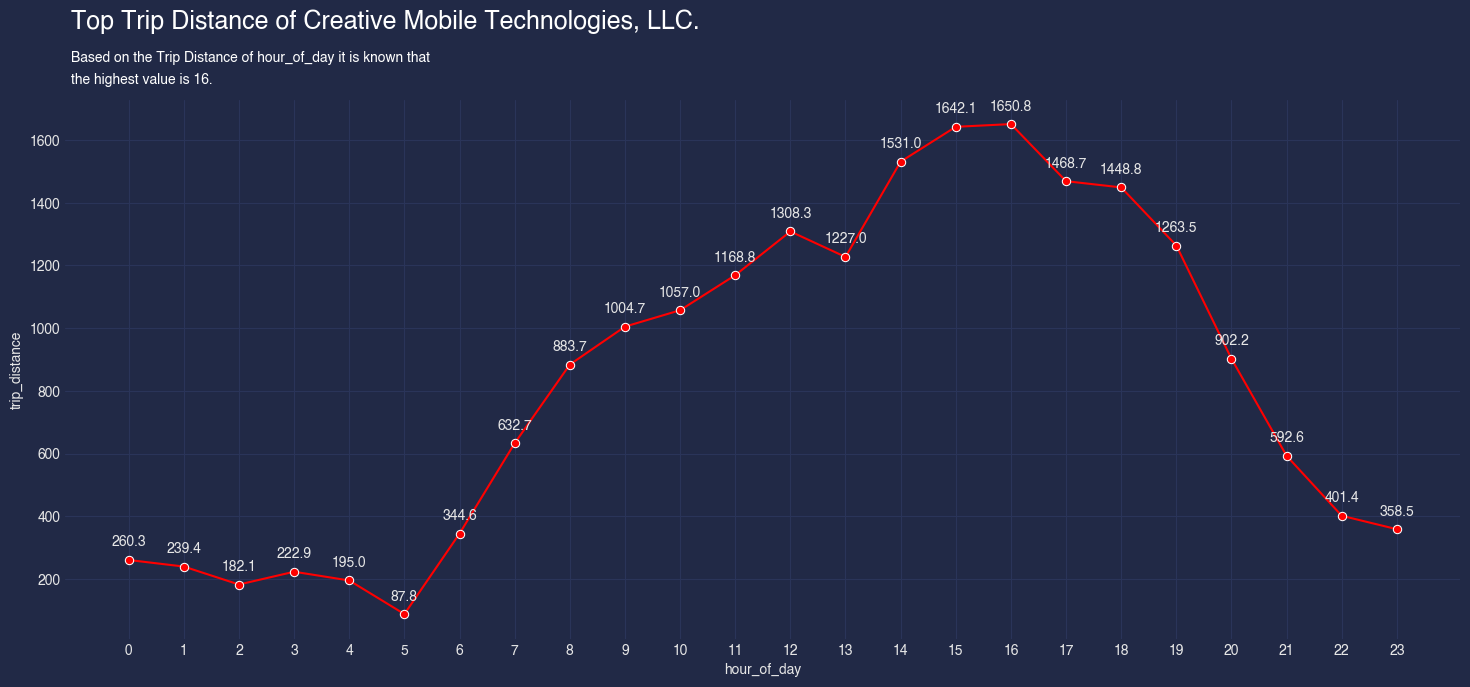

In [280]:
# Your code to generate the dataframe and calculate max_hour

# Plot the line plot using the custom color palette
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='trip_distance', x='hour_of_day', data=top_trip_distance_VendorID_1_hour_of_day, color='red', marker='o')

# Add value labels to the x-axis
ax.set_xticks(top_trip_distance_VendorID_1_hour_of_day['hour_of_day'])
ax.set_xticklabels(top_trip_distance_VendorID_1_hour_of_day['hour_of_day'])

# Add annotations for each data point
for x, y in zip(top_trip_distance_VendorID_1_hour_of_day['hour_of_day'], top_trip_distance_VendorID_1_hour_of_day['trip_distance']):
    ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels for the x-axis and title
plt.xlabel('hour_of_day')
plt.ylabel('trip_distance')

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Top Trip Distance of Creative Mobile Technologies, LLC.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the Trip Distance of hour_of_day it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')

plt.text(s="the highest value is 16.", 
        ha='left', x=xmin+0.1, y=ymax*1.03, 
        fontsize=10, fontweight='light', 
        color='white')

# Display the plot
plt.show()


In [281]:
top_trip_distance_VendorID_1_day_of_week = df_VendorID_1[["trip_distance", "day_of_week"]].groupby("day_of_week").sum().sort_values("trip_distance", ascending = False).reset_index()
top_trip_distance_VendorID_1_day_of_week

,day_of_week,trip_distance
0,Tuesday,3268.4
1,Thursday,3188.8
2,Monday,3133.4
3,Wednesday,2795.1
4,Friday,2695.7
5,Sunday,2597.9
6,Saturday,2394.6


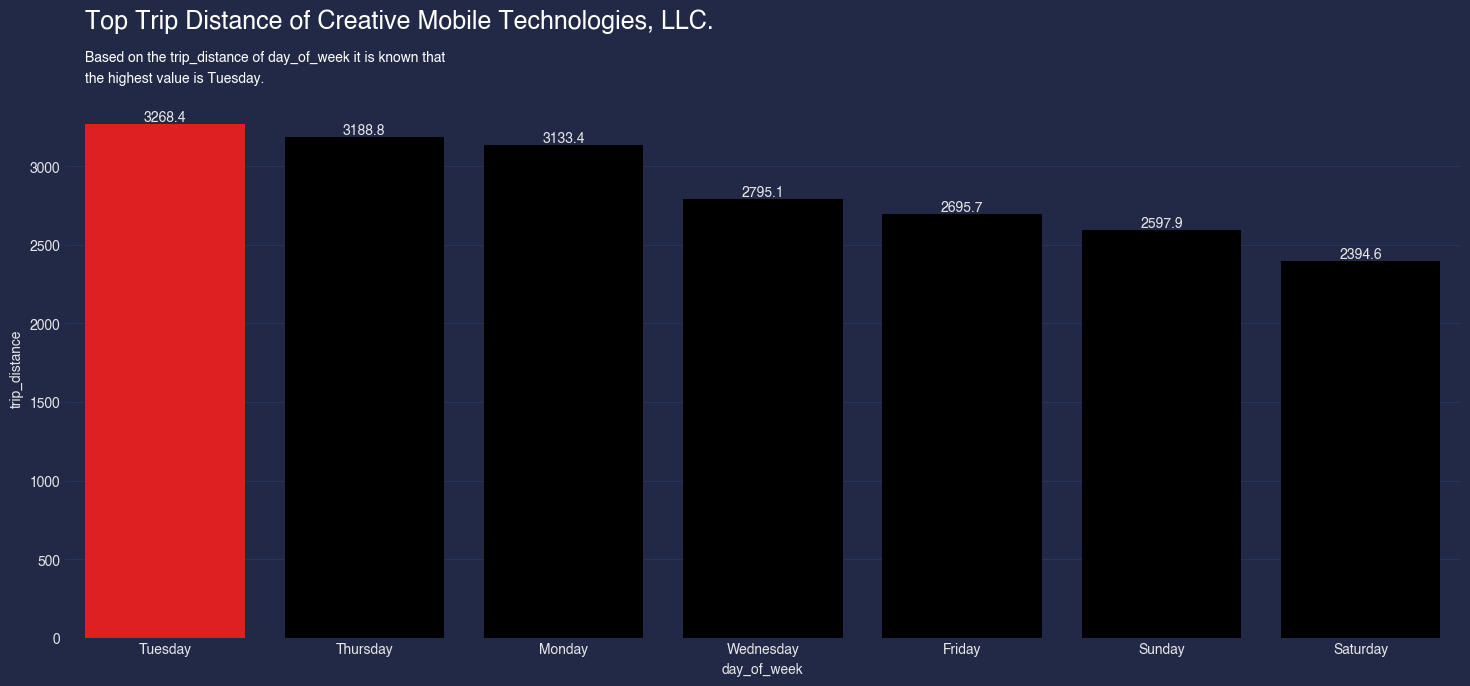

In [282]:
top_trip_distance_VendorID_1_day_of_week = df_VendorID_1[["trip_distance", "day_of_week"]].groupby("day_of_week").sum().sort_values("trip_distance", ascending = False).reset_index()
top_trip_distance_VendorID_1_day_of_week

plt.figure(figsize= (18, 7))
clrs = ['black' if(x<max(top_trip_distance_VendorID_1_day_of_week.trip_distance)) else 'red' for x in top_trip_distance_VendorID_1_day_of_week.trip_distance ]
ax = sns.barplot(y= 'trip_distance',x='day_of_week', data= top_trip_distance_VendorID_1_day_of_week, palette=clrs)
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('trip_distance')

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Top Trip Distance of Creative Mobile Technologies, LLC.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the trip_distance of day_of_week it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')
plt.text(s="the highest value is Tuesday.", 
        ha='left', x=xmin+0.1, y=ymax*1.03, 
        fontsize=10, fontweight='light', 
        color='white')

plt.show()

Penjelasan grafik ini adalah sebagai berikut:

1. Analisis Data:
   - Grafik ini mengambil kolom "trip_distance" dan "day_of_week" dari DataFrame `df_VendorID_1`.
   - Kemudian data dikelompokkan berdasarkan "day_of_week" (hari dalam seminggu) dan dilakukan penjumlahan trip_distance untuk setiap grup.
   - Hasilnya diurutkan berdasarkan "trip_distance" secara menurun menggunakan `sort_values`.
   - DataFrame hasil analisis tersebut disimpan dalam variabel `top_trip_distance_VendorID_1`.

2. Visualisasi Grafik:
   - Grafik batang digunakan untuk memvisualisasikan hasil analisis data.
   - Ukuran grafik ditentukan dengan `plt.figure(figsize=(18, 7))`, yang mengatur lebar=18 inci dan tinggi=7 inci.
   - Warna batang dalam grafik ditentukan berdasarkan trip_distance.
     - Jika trip_distance suatu hari lebih rendah dari trip_distance maksimum, batang tersebut akan berwarna hitam.
     - Jika trip_distance suatu hari merupakan trip_distance maksimum, batang tersebut akan berwarna merah.
   - Label (nilai dari setiap batang) ditambahkan ke dalam grafik batang menggunakan `ax.bar_label(i,)`, di mana `ax.containers` mengacu pada objek kontainer dalam grafik batang.

3. Informasi yang Disampaikan:
   - Grafik batang ini memberikan informasi tentang trip_distance teratas untuk setiap hari dalam seminggu.
   - Dengan menggunakan warna merah untuk menyoroti hari dengan trip_distance tertinggi, kita dapat dengan mudah mengidentifikasi hari-hari dengan trip_distance yang tinggi.
   - Warna hitam digunakan untuk hari-hari dengan trip_distance yang lebih rendah.
   - Judul grafik "Top Trip Distance of Creative Mobile Technologies, LLC." memberikan konteks tentang data yang sedang dianalisis, yaitu trip_distance dari perusahaan Creative Mobile Technologies, LLC.

Melalui analisis data dan visualisasi grafik ini, kita dapat memperoleh pemahaman yang lebih baik tentang pola dan tren trip_distance untuk setiap hari dalam seminggu. Dengan menyoroti hari dengan trip_distance tertinggi, kita dapat mengidentifikasi hari-hari yang mungkin memiliki jarak perjalanan yang lebih panjang atau menarik minat pengguna.

# Vendor 2 Bar Chart

### Top passenger_count of hour_of_day

In [283]:
top_passenger_count_VendorID_2_hour_of_day = df_VendorID_2[["passenger_count", "hour_of_day"]].groupby("hour_of_day").sum().sort_values("passenger_count", ascending = False).reset_index()
top_passenger_count_VendorID_2_hour_of_day

,hour_of_day,passenger_count
0,18,5083.0
1,16,4816.0
2,17,4731.0
3,15,4351.0
4,19,4222.0
5,14,3831.0
6,11,3536.0
7,10,3382.0
8,12,3315.0
9,9,3297.0


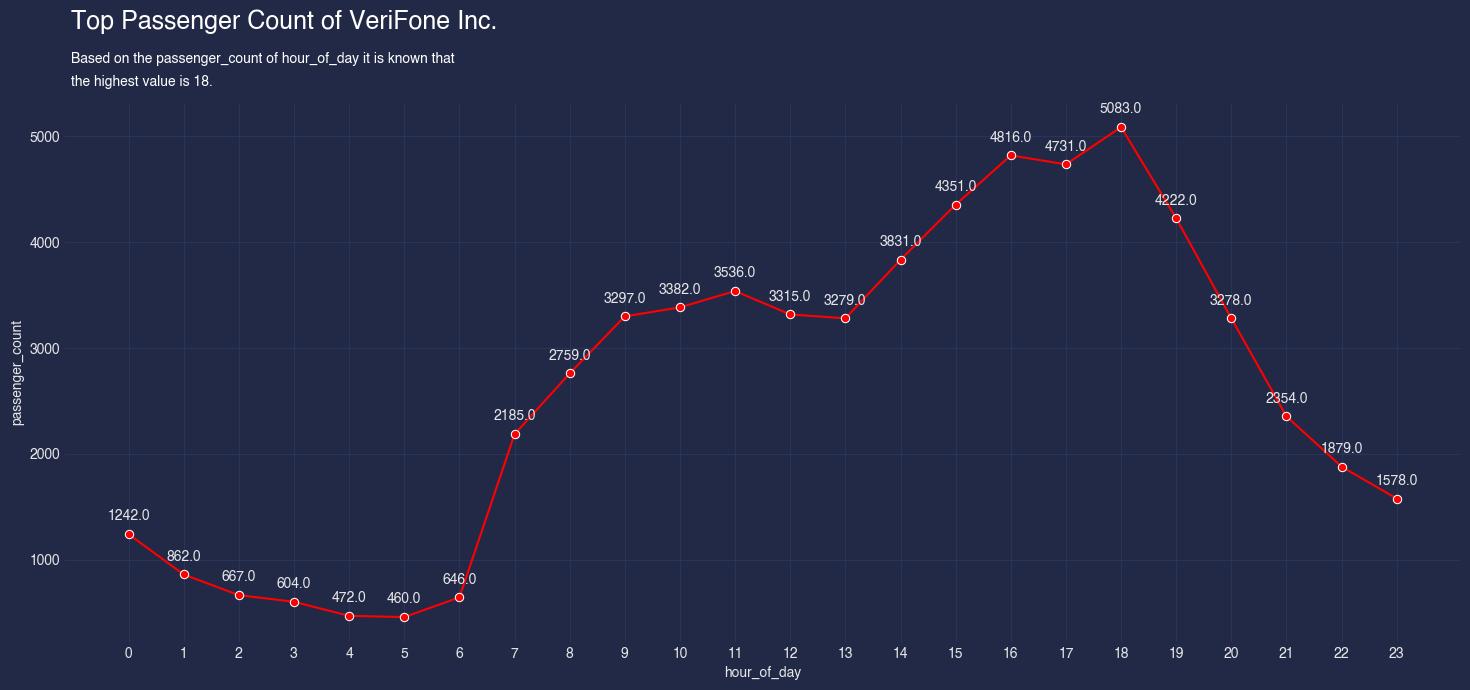

In [284]:
# Your code to generate the dataframe and calculate max_hour

# Plot the line plot using the custom color palette
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='passenger_count', x='hour_of_day', data=top_passenger_count_VendorID_2_hour_of_day, color='red', marker='o')

# Add value labels to the x-axis
ax.set_xticks(top_passenger_count_VendorID_2_hour_of_day['hour_of_day'])
ax.set_xticklabels(top_passenger_count_VendorID_2_hour_of_day['hour_of_day'])

# Add annotations for each data point
for x, y in zip(top_passenger_count_VendorID_2_hour_of_day['hour_of_day'], top_passenger_count_VendorID_2_hour_of_day['passenger_count']):
    ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels for the x-axis and title
plt.xlabel('hour_of_day')
plt.ylabel('passenger_count')

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Top Passenger Count of VeriFone Inc.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the passenger_count of hour_of_day it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')
plt.text(s="the highest value is 18.", 
        ha='left', x=xmin+0.1, y=ymax*1.03, 
        fontsize=10, fontweight='light', 
        color='white')

# Display the plot
plt.show()


In [285]:
top_passenger_count_VendorID_2_day_of_week = df_VendorID_2[["passenger_count", "day_of_week"]].groupby("day_of_week").sum().sort_values("passenger_count", ascending = False).reset_index()
top_passenger_count_VendorID_2_day_of_week

,day_of_week,passenger_count
0,Tuesday,10226.0
1,Friday,9357.0
2,Thursday,9303.0
3,Monday,9218.0
4,Wednesday,8952.0
5,Sunday,7988.0
6,Saturday,7785.0


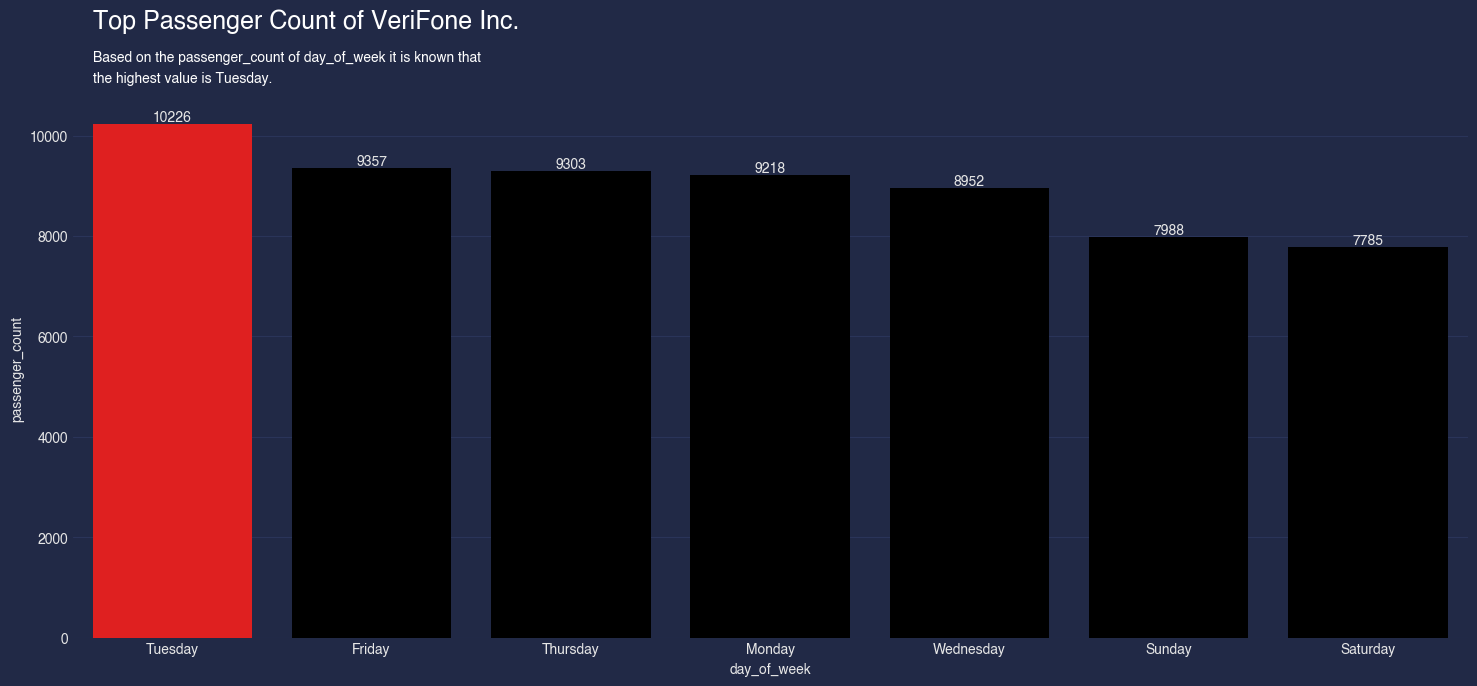

In [286]:
top_passenger_count_VendorID_2_day_of_week = df_VendorID_2[["passenger_count", "day_of_week"]].groupby("day_of_week").sum().sort_values("passenger_count", ascending = False).reset_index()
top_passenger_count_VendorID_2_day_of_week

plt.figure(figsize= (18, 7))
clrs = ['black' if(x<max(top_passenger_count_VendorID_2_day_of_week.passenger_count)) else 'red' for x in top_passenger_count_VendorID_2_day_of_week.passenger_count ]
ax = sns.barplot(y= 'passenger_count',x='day_of_week', data= top_passenger_count_VendorID_2_day_of_week, palette=clrs)
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('passenger_count')  


ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Top Passenger Count of VeriFone Inc.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the passenger_count of day_of_week it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')

plt.text(s="the highest value is Tuesday.", 
        ha='left', x=xmin+0.1, y=ymax*1.03, 
        fontsize=10, fontweight='light', 
        color='white')

plt.show()



Penjelasan grafik ini adalah sebagai berikut:

1. Analisis Data:
   - Grafik ini mengambil kolom "passenger_count" dan "day_of_week" dari DataFrame `df_VendorID_2`.
   - Kemudian data dikelompokkan berdasarkan "day_of_week" (hari dalam seminggu) dan dilakukan penjumlahan passenger_count untuk setiap grup.
   - Hasilnya diurutkan berdasarkan "passenger_count" secara menurun menggunakan `sort_values`.
   - DataFrame hasil analisis tersebut disimpan dalam variabel `top_passenger_count_VendorID_2`.

2. Visualisasi Grafik:
   - Grafik batang digunakan untuk memvisualisasikan hasil analisis data.
   - Ukuran grafik ditentukan dengan `plt.figure(figsize=(18, 7))`, yang mengatur lebar=18 inci dan tinggi=7 inci.
   - Warna batang dalam grafik ditentukan berdasarkan passenger_count.
     - Jika passenger_count suatu hari lebih rendah dari passenger_count maksimum, batang tersebut akan berwarna hitam.
     - Jika passenger_count suatu hari merupakan passenger_count maksimum, batang tersebut akan berwarna merah.
   - Label (nilai dari setiap batang) ditambahkan ke dalam grafik batang menggunakan `ax.bar_label(i,)`, di mana `ax.containers` mengacu pada objek kontainer dalam grafik batang.

3. Informasi yang Disampaikan:
   - Grafik batang ini memberikan informasi tentang passenger_count teratas untuk setiap hari dalam seminggu.
   - Dengan menggunakan warna merah untuk menyoroti hari dengan passenger_count tertinggi, kita dapat dengan mudah mengidentifikasi hari-hari dengan jumlah penumpang terbanyak.
   - Warna hitam digunakan untuk hari-hari dengan jumlah penumpang yang lebih rendah.
   - Judul grafik "Top Passenger Count of VeriFone Inc." memberikan konteks tentang data yang sedang dianalisis, yaitu jumlah penumpang dari perusahaan VeriFone Inc.

Melalui analisis data dan visualisasi grafik ini, kita dapat memperoleh pemahaman yang lebih baik tentang pola dan tren jumlah penumpang (passenger_count) untuk setiap hari dalam seminggu. Dengan menyoroti hari dengan passenger_count tertinggi, kita dapat mengidentifikasi hari-hari yang mungkin memiliki jumlah penumpang yang lebih banyak atau menarik minat pengguna.

### Top total_amount of hour_of_day

In [287]:
top_total_amount_VendorID_2_hour_of_day = df_VendorID_2[["total_amount", "hour_of_day"]].groupby("hour_of_day").sum().sort_values("total_amount", ascending = False).reset_index()
top_total_amount_VendorID_2_hour_of_day

,hour_of_day,total_amount
0,18,95205.72
1,16,90492.27
2,17,90052.48
3,19,77932.43
4,15,77376.21
5,14,71258.04
6,11,63582.61
7,12,63015.40
8,9,60445.18
9,10,59884.67


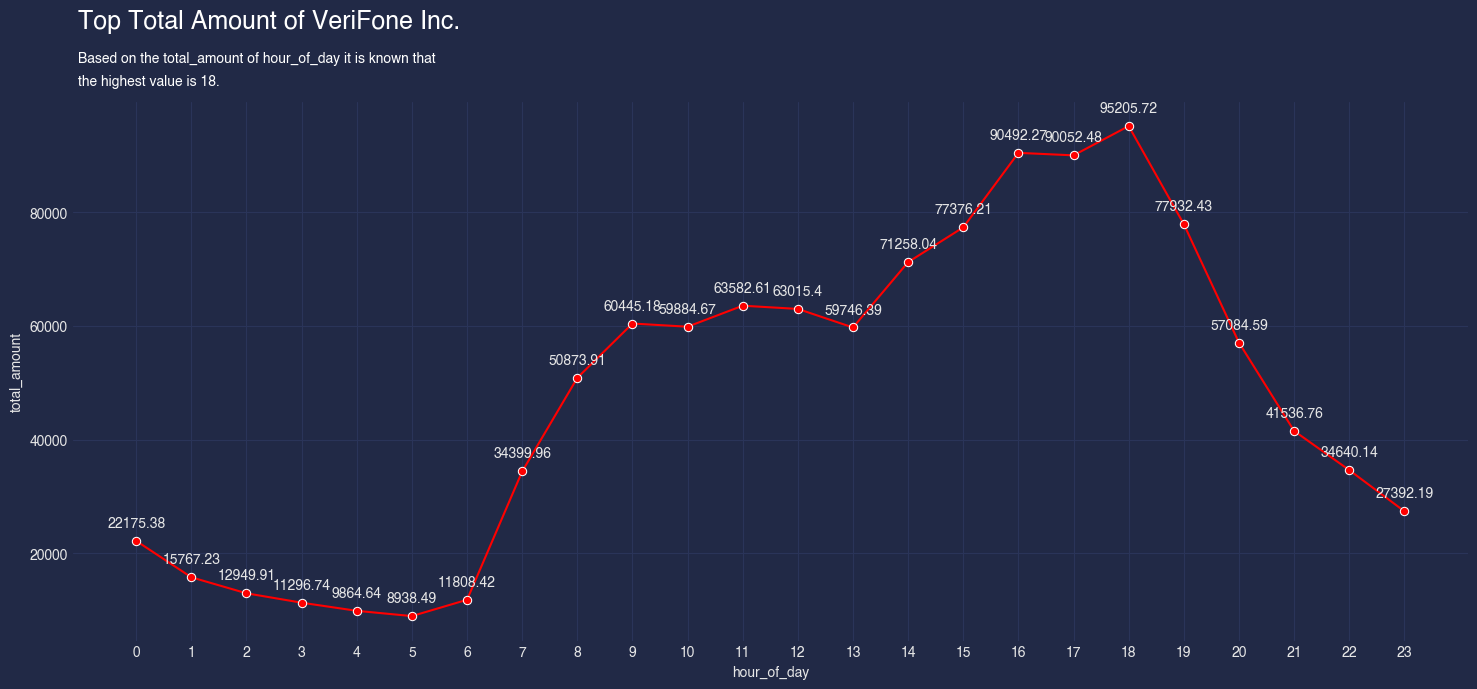

In [288]:
# Your code to generate the dataframe and calculate max_hour

# Plot the line plot using the custom color palette
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='total_amount', x='hour_of_day', data=top_total_amount_VendorID_2_hour_of_day, color='red', marker='o')

# Add value labels to the x-axis
ax.set_xticks(top_total_amount_VendorID_2_hour_of_day['hour_of_day'])
ax.set_xticklabels(top_total_amount_VendorID_2_hour_of_day['hour_of_day'])

# Add annotations for each data point
for x, y in zip(top_total_amount_VendorID_2_hour_of_day['hour_of_day'], top_total_amount_VendorID_2_hour_of_day['total_amount']):
    ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels for the x-axis and title
plt.xlabel('hour_of_day')
plt.ylabel('total_amount')

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Top Total Amount of VeriFone Inc.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the total_amount of hour_of_day it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')
plt.text(s="the highest value is 18.", 
        ha='left', x=xmin+0.1, y=ymax*1.03, 
        fontsize=10, fontweight='light', 
        color='white')

# Display the plot
plt.show()


### Top total_amount of day_of_week

In [289]:
top_total_amount_VendorID_2_day_of_week = df_VendorID_2[["total_amount", "day_of_week"]].groupby("day_of_week").sum().sort_values("total_amount", ascending = False).reset_index()
top_total_amount_VendorID_2_day_of_week

,day_of_week,total_amount
0,Tuesday,188514.75
1,Thursday,173428.38
2,Friday,170085.41
3,Monday,165754.09
4,Wednesday,163721.64
5,Saturday,144634.11
6,Sunday,141581.38


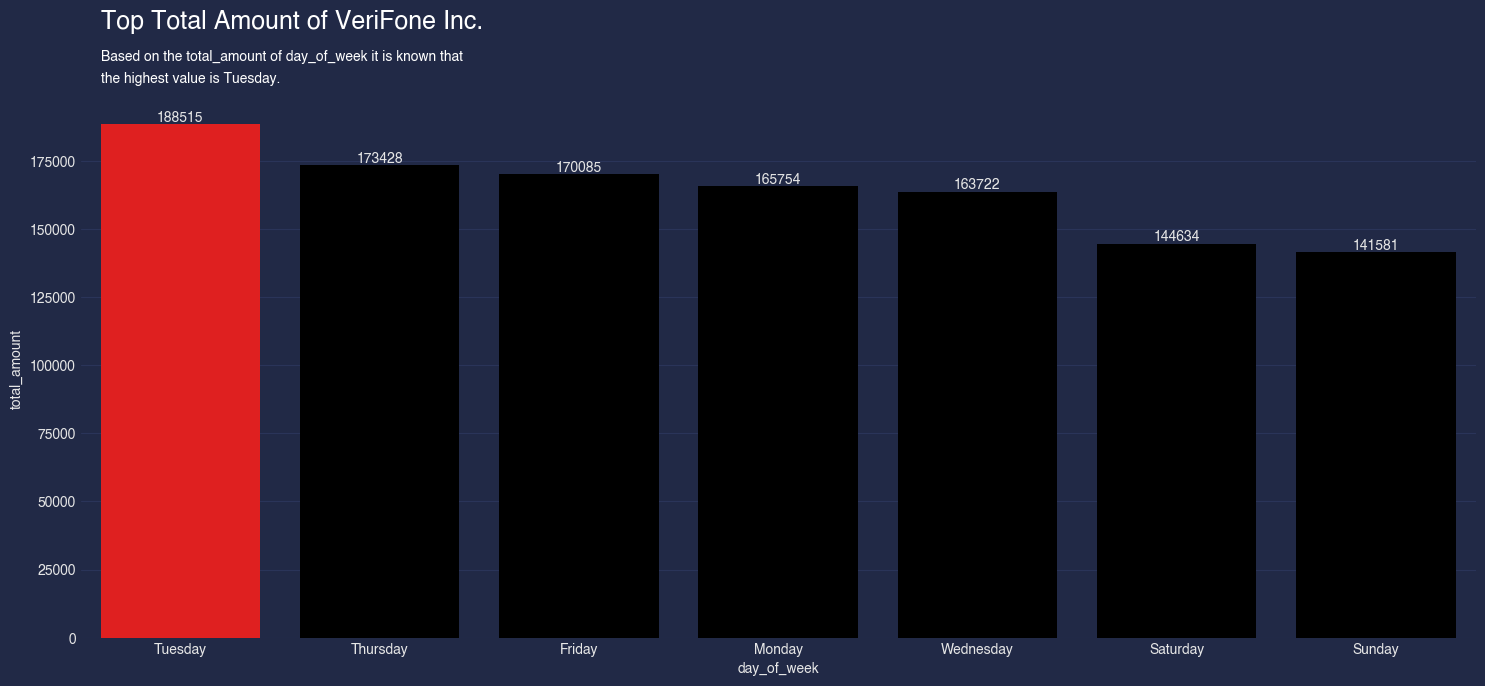

In [290]:
top_total_amount_VendorID_2_day_of_week = df_VendorID_2[["total_amount", "day_of_week"]].groupby("day_of_week").sum().sort_values("total_amount", ascending = False).reset_index()
top_total_amount_VendorID_2_day_of_week

plt.figure(figsize= (18, 7))
clrs = ['black' if(x<max(top_total_amount_VendorID_2_day_of_week.total_amount)) else 'red' for x in top_total_amount_VendorID_2_day_of_week.total_amount ]
ax = sns.barplot(y= 'total_amount',x='day_of_week', data= top_total_amount_VendorID_2_day_of_week, palette=clrs)
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('total_amount')  

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Top Total Amount of VeriFone Inc.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the total_amount of day_of_week it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')
plt.text(s="the highest value is Tuesday.", 
        ha='left', x=xmin+0.1, y=ymax*1.03, 
        fontsize=10, fontweight='light', 
        color='white')

plt.show()

Penjelasan grafik ini adalah sebagai berikut:

1. Analisis Data:
   - Grafik ini mengambil kolom "total_amount" dan "day_of_week" dari DataFrame `df_VendorID_2`.
   - Kemudian data dikelompokkan berdasarkan "day_of_week" (hari dalam seminggu) dan dilakukan penjumlahan total_amount untuk setiap grup.
   - Hasilnya diurutkan berdasarkan "total_amount" secara menurun menggunakan `sort_values`.
   - DataFrame hasil analisis tersebut disimpan dalam variabel `top_total_amount_VendorID_2`.

2. Penyesuaian Palet Warna:
   - Sebuah palet warna kustom dibuat dengan menggunakan `sns.color_palette`.
   - Warna hitam ditetapkan untuk nilai total_amount yang lebih rendah dari total_amount tertinggi menggunakan `['black'] if(x<max(top_total_amount_VendorID_2.total_amount))`.
   - Warna merah ditetapkan untuk total_amount tertinggi menggunakan `else 'red'`.

3. Visualisasi Grafik:
   - Grafik batang digunakan untuk memvisualisasikan hasil analisis data.
   - Ukuran grafik ditentukan dengan `plt.figure(figsize=(18, 7))`, yang mengatur lebar=18 inci dan tinggi=7 inci.
   - Grafik batang menggunakan palet warna kustom yang telah disesuaikan dengan menggunakan `palette=clrs`.
   - Label (nilai dari setiap batang) ditambahkan ke dalam grafik batang menggunakan `ax.bar_label(i,)`, di mana `ax.containers` mengacu pada objek kontainer dalam grafik batang.

4. Informasi yang Disampaikan:
   - Grafik batang ini memberikan informasi tentang total_amount teratas untuk setiap hari dalam seminggu.
   - Warna merah digunakan untuk menyoroti hari dengan total_amount tertinggi, sedangkan warna hitam digunakan untuk hari-hari dengan total_amount yang lebih rendah.
   - Dengan demikian, kita dapat dengan mudah mengidentifikasi hari-hari dengan total_amount yang paling tinggi.
   - Judul grafik "Top Total Amount of VeriFone Inc." memberikan konteks tentang data yang sedang dianalisis, yaitu total_amount dari perusahaan VeriFone Inc.

Melalui analisis data dan visualisasi grafik ini, kita dapat memperoleh pemahaman yang lebih baik tentang pola dan tren total_amount untuk setiap hari dalam seminggu. Dengan menyoroti hari dengan total_amount tertinggi, kita dapat mengidentifikasi hari-hari yang mungkin memiliki total_amount yang lebih tinggi atau menarik minat pengguna.

In [291]:
top_trip_distance_VendorID_2_hour_of_day = df_VendorID_2[["trip_distance", "hour_of_day"]].groupby("hour_of_day").sum().sort_values("trip_distance", ascending = False).reset_index()
top_trip_distance_VendorID_2_hour_of_day

,hour_of_day,trip_distance
0,18,11643.62
1,16,11219.49
2,17,10650.09
3,15,10288.79
4,14,9893.78
5,19,9776.96
6,12,8867.53
7,11,8860.78
8,9,8549.14
9,10,8288.58


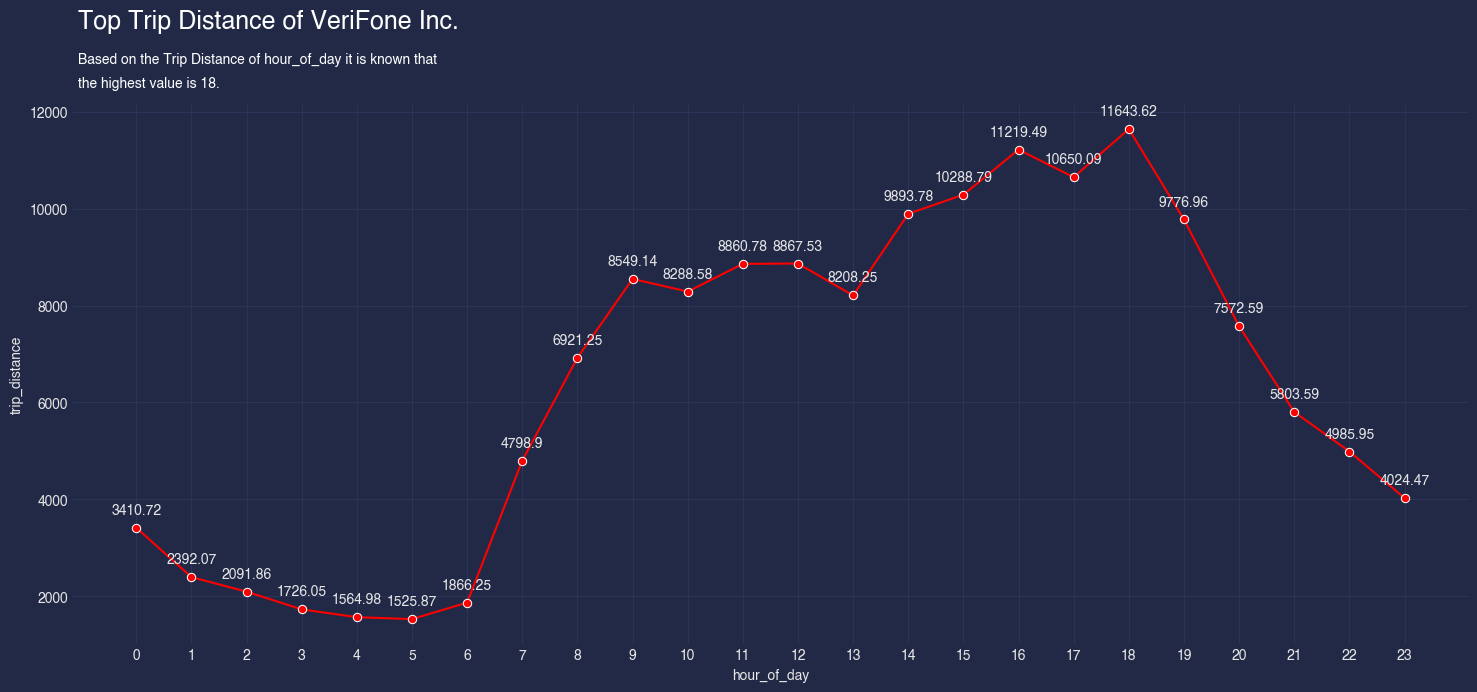

In [292]:
# Your code to generate the dataframe and calculate max_hour

# Plot the line plot using the custom color palette
plt.figure(figsize=(18, 7))
ax = sns.lineplot(y='trip_distance', x='hour_of_day', data=top_trip_distance_VendorID_2_hour_of_day, color='red', marker='o')

# Add value labels to the x-axis
ax.set_xticks(top_trip_distance_VendorID_2_hour_of_day['hour_of_day'])
ax.set_xticklabels(top_trip_distance_VendorID_2_hour_of_day['hour_of_day'])

# Add annotations for each data point
for x, y in zip(top_trip_distance_VendorID_2_hour_of_day['hour_of_day'], top_trip_distance_VendorID_2_hour_of_day['trip_distance']):
    ax.annotate(f"{y}", (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Add labels for the x-axis and title
plt.xlabel('hour_of_day')
plt.ylabel('trip_distance')


ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Top Trip Distance of VeriFone Inc.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the Trip Distance of hour_of_day it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')
plt.text(s="the highest value is 18.", 
        ha='left', x=xmin+0.1, y=ymax*1.03, 
        fontsize=10, fontweight='light', 
        color='white')

# Display the plot
plt.show()


In [293]:
top_trip_distance_VendorID_2_day_of_week = df_VendorID_2[["trip_distance", "day_of_week"]].groupby("day_of_week").sum().sort_values("trip_distance", ascending = False).reset_index()
top_trip_distance_VendorID_2_day_of_week

,day_of_week,trip_distance
0,Tuesday,24665.98
1,Friday,22979.79
2,Thursday,22659.90
3,Monday,22525.96
4,Wednesday,21231.77
5,Saturday,20536.89
6,Sunday,20331.27


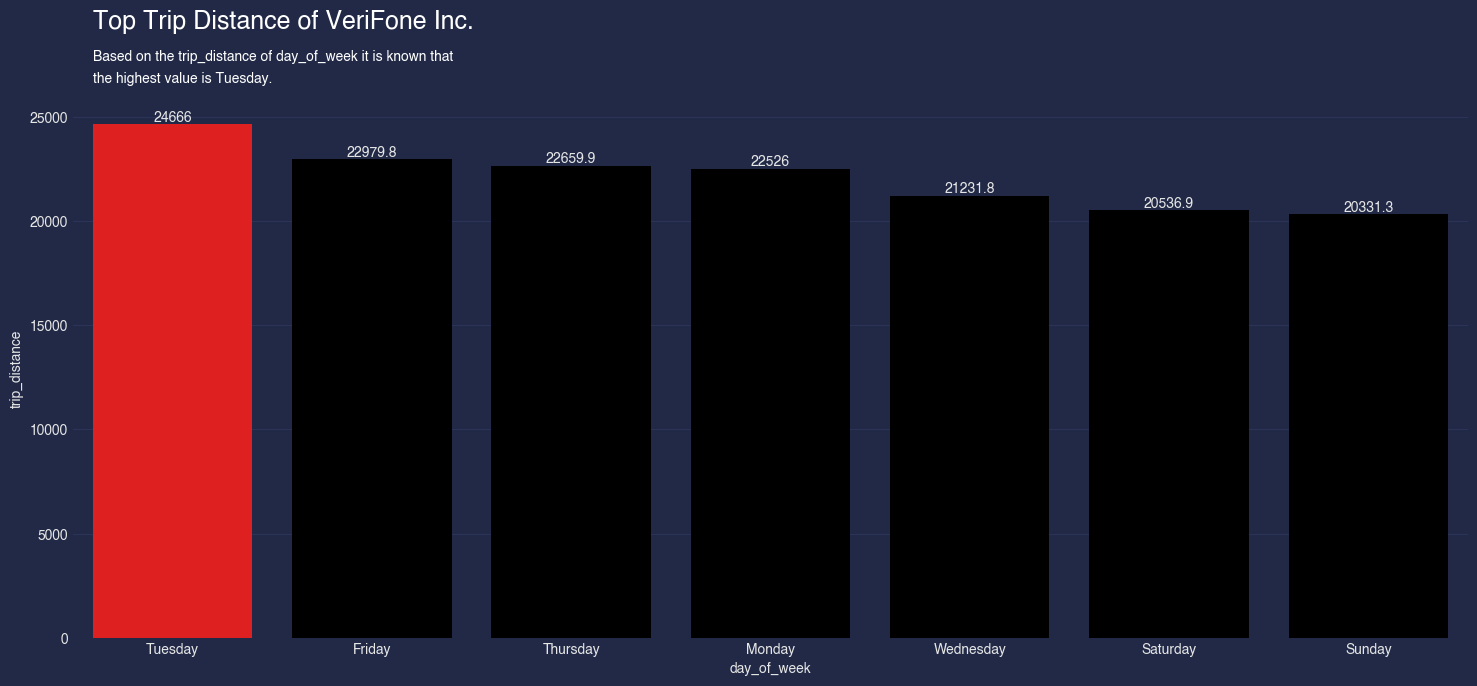

In [294]:
top_trip_distance_VendorID_2_day_of_week = df_VendorID_2[["trip_distance", "day_of_week"]].groupby("day_of_week").sum().sort_values("trip_distance", ascending = False).reset_index()
top_trip_distance_VendorID_2_day_of_week

plt.figure(figsize= (18, 7))
clrs = ['black' if(x<max(top_trip_distance_VendorID_2_day_of_week.trip_distance)) else 'red' for x in top_trip_distance_VendorID_2_day_of_week.trip_distance ]
ax = sns.barplot(y= 'trip_distance',x='day_of_week', data= top_trip_distance_VendorID_2_day_of_week, palette=clrs)
for i in ax.containers:
    ax.bar_label(i,)
plt.ylabel('trip_distance')  

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Top Trip Distance of VeriFone Inc.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the trip_distance of day_of_week it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')
plt.text(s="the highest value is Tuesday.", 
        ha='left', x=xmin+0.1, y=ymax*1.03, 
        fontsize=10, fontweight='light', 
        color='white')

plt.show()

Penjelasan grafik ini adalah sebagai berikut:

1. Analisis Data:
   - Grafik ini mengambil kolom "trip_distance" dan "day_of_week" dari DataFrame `df_VendorID_2`.
   - Kemudian data dikelompokkan berdasarkan "day_of_week" (hari dalam seminggu) dan dilakukan penjumlahan trip_distance untuk setiap grup.
   - Hasilnya diurutkan berdasarkan "trip_distance" secara menurun menggunakan `sort_values`.
   - DataFrame hasil analisis tersebut disimpan dalam variabel `top_trip_distance_VendorID_2`.

2. Penyesuaian Palet Warna:
   - Sebuah palet warna kustom dibuat dengan menggunakan `clrs = ['black' if(x<max(top_trip_distance_VendorID_2.trip_distance)) else 'red' for x in top_trip_distance_VendorID_2.trip_distance]`.
   - Warna hitam ditetapkan untuk nilai trip_distance yang lebih rendah dari trip_distance tertinggi, sementara warna merah ditetapkan untuk trip_distance tertinggi.

3. Visualisasi Grafik:
   - Grafik batang digunakan untuk memvisualisasikan hasil analisis data.
   - Ukuran grafik ditentukan dengan `plt.figure(figsize=(18, 7))`, yang mengatur lebar=18 inci dan tinggi=7 inci.
   - Grafik batang menggunakan palet warna kustom yang telah disesuaikan dengan menggunakan `palette=clrs`.
   - Label (nilai dari setiap batang) ditambahkan ke dalam grafik batang menggunakan `ax.bar_label(i,)`, di mana `ax.containers` mengacu pada objek kontainer dalam grafik batang.

4. Informasi yang Disampaikan:
   - Grafik batang ini memberikan informasi tentang trip_distance teratas untuk setiap hari dalam seminggu.
   - Warna merah digunakan untuk menyoroti hari dengan trip_distance tertinggi, sedangkan warna hitam digunakan untuk hari-hari dengan trip_distance yang lebih rendah.
   - Dengan demikian, kita dapat dengan mudah mengidentifikasi hari-hari dengan trip_distance yang paling tinggi.
   - Judul grafik "Top Trip Distance of VeriFone Inc." memberikan konteks tentang data yang sedang dianalisis, yaitu trip_distance dari perusahaan VeriFone Inc.

Melalui analisis data dan visualisasi grafik ini, kita dapat memperoleh pemahaman yang lebih baik tentang pola dan tren trip_distance untuk setiap hari dalam seminggu. Dengan menyoroti hari dengan trip_distance tertinggi, kita dapat mengidentifikasi pola perjalanan yang lebih jauh atau menarik minat pengguna pada hari-hari tertentu.

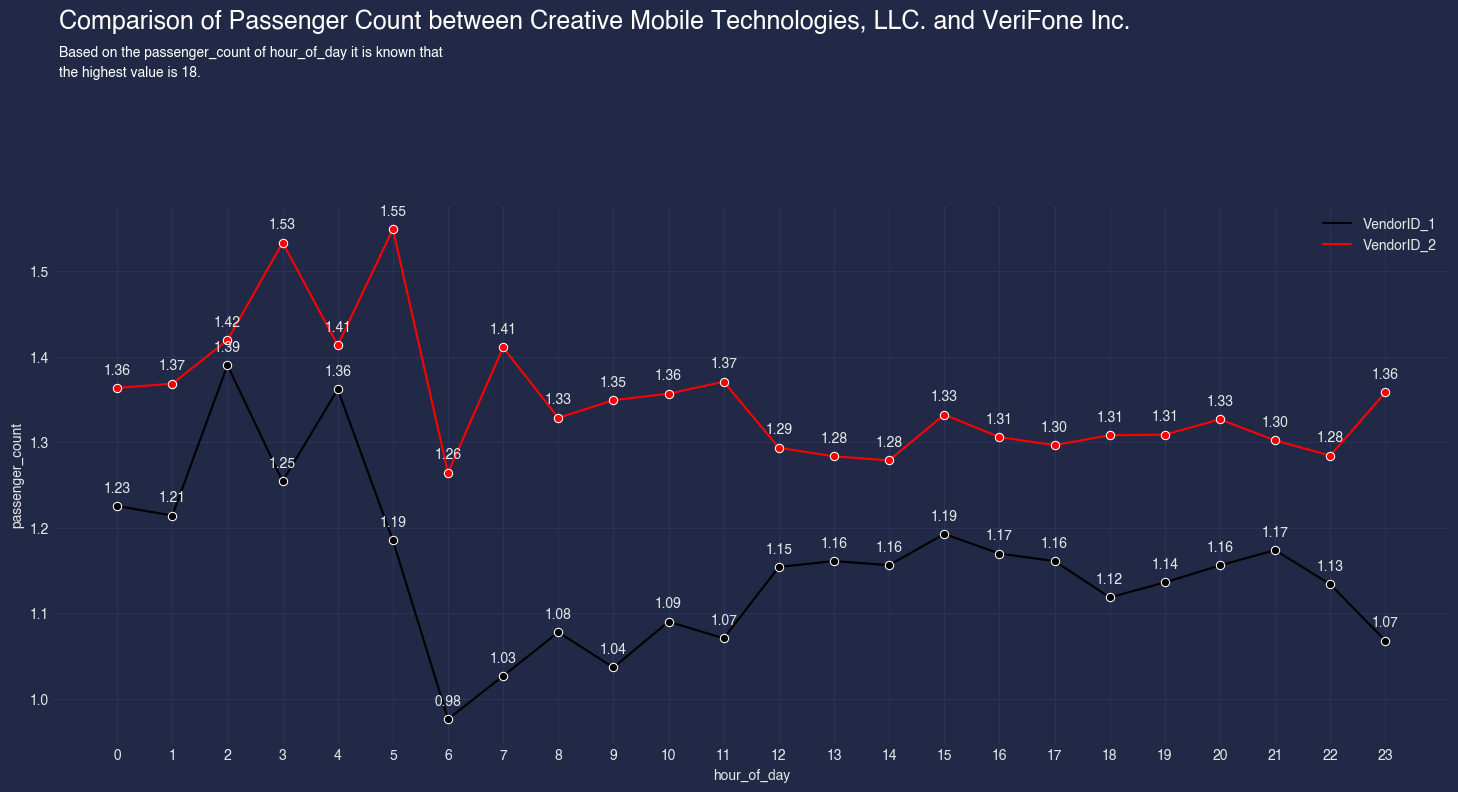

In [295]:
# Get the total passenger count for each hour of the day for VendorID_1
passenger_count_VendorID_1 = df_VendorID_1.groupby('hour_of_day')['passenger_count'].mean().reset_index()
passenger_count_VendorID_1.rename(columns={'passenger_count': 'VendorID_1'}, inplace=True)

# Get the total passenger count for each hour of the day for VendorID_2
passenger_count_VendorID_2 = df_VendorID_2.groupby('hour_of_day')['passenger_count'].mean().reset_index()
passenger_count_VendorID_2.rename(columns={'passenger_count': 'VendorID_2'}, inplace=True)

# Merge the two dataframes on the 'hour_of_day' column
comparison_df = pd.merge(passenger_count_VendorID_1, passenger_count_VendorID_2, on='hour_of_day')

# Set the figure size and plot the line chart with the custom color palette
plt.figure(figsize=(18, 7))
ax = sns.lineplot(x='hour_of_day', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['hour_of_day'], value_vars=['VendorID_1', 'VendorID_2']), palette={'VendorID_1': 'black', 'VendorID_2': 'red'}, marker='o')

# Add annotations for each data point
for _, row in comparison_df.iterrows():
    plt.annotate(f"{row['VendorID_1']:.2f}", (row['hour_of_day'], row['VendorID_1']), xytext=(0, 10), textcoords='offset points', ha='center')
    plt.annotate(f"{row['VendorID_2']:.2f}", (row['hour_of_day'], row['VendorID_2']), xytext=(0, 10), textcoords='offset points', ha='center')

# Add value labels to the x-axis
ax.set_xticks(comparison_df['hour_of_day'])
ax.set_xticklabels(comparison_df['hour_of_day'])

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Comparison of Passenger Count between Creative Mobile Technologies, LLC. and VeriFone Inc.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the passenger_count of hour_of_day it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.11, 
        fontsize=10, fontweight='light', 
        color='white')

plt.text(s="the highest value is 18.", 
        ha='left', x=xmin+0.1, y=ymax*1.095, 
        fontsize=10, fontweight='light', 
        color='white')

plt.xlabel('hour_of_day')
plt.ylabel('passenger_count')
plt.legend()
plt.show()


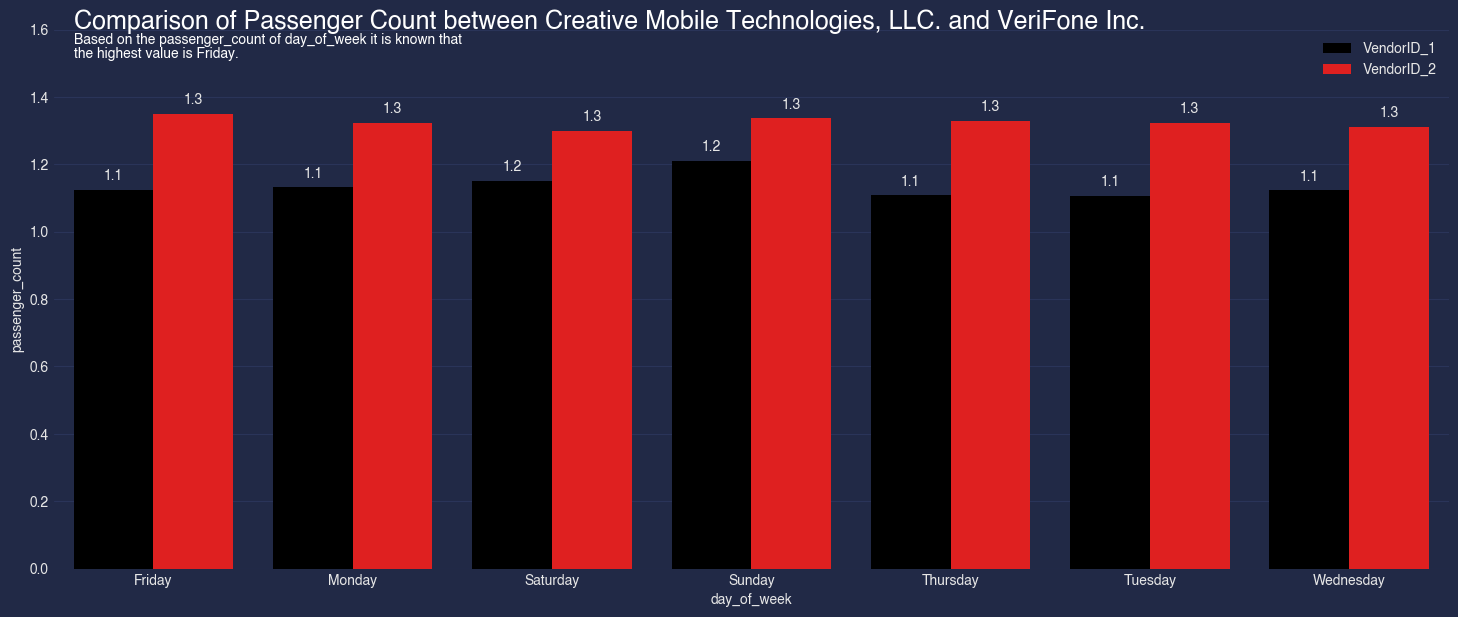

In [296]:
# Get the total passenger count for each hour of the day for VendorID_1
passenger_count_VendorID_1 = df_VendorID_1.groupby('day_of_week')['passenger_count'].mean().reset_index()
passenger_count_VendorID_1.rename(columns={'passenger_count': 'VendorID_1'}, inplace=True)

# Get the total passenger count for each hour of the day for VendorID_2
passenger_count_VendorID_2 = df_VendorID_2.groupby('day_of_week')['passenger_count'].mean().reset_index()
passenger_count_VendorID_2.rename(columns={'passenger_count': 'VendorID_2'}, inplace=True)

# Merge the two dataframes on the 'hour_of_day' column
comparison_df = pd.merge(passenger_count_VendorID_1, passenger_count_VendorID_2, on='day_of_week')

# Set the custom color palette with VendorID_1 bars in black aday_of_weeknd VendorID_2 bars in red
my_palette = sns.color_palette(['black', 'red'])

# Set the figure size and plot the bar chart with the custom color palette
plt.figure(figsize=(18, 7))

ax = sns.barplot(x='day_of_week', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['day_of_week'], value_vars=['VendorID_1', 'VendorID_2']), palette=my_palette)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Comparison of Passenger Count between Creative Mobile Technologies, LLC. and VeriFone Inc.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the passenger_count of day_of_week it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.10, 
        fontsize=10, fontweight='light', 
        color='white')

plt.text(s="the highest value is Friday.", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')

plt.xlabel('day_of_week')
plt.ylabel('passenger_count')
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6])
plt.legend()
plt.show()

Penjelasan grafik ini adalah sebagai berikut:

1. Analisis Data:
   - Grafik ini menghitung rata-rata jumlah penumpang (passenger_count) untuk setiap hari dalam seminggu, terpisah untuk VendorID_1 dan VendorID_2.
   - DataFrame `passenger_count_VendorID_1` dan `passenger_count_VendorID_2` dibuat dengan menggunakan metode `groupby` pada kolom 'day_of_week' dan kemudian menghitung rata-rata passenger_count.
   - Hasilnya disimpan dalam DataFrame yang memiliki kolom 'day_of_week' dan 'VendorID_1' atau 'VendorID_2', masing-masing merepresentasikan rata-rata passenger_count untuk VendorID_1 dan VendorID_2.

2. Visualisasi Grafik:
   - Grafik batang digunakan untuk memvisualisasikan perbandingan rata-rata passenger_count antara VendorID_1 dan VendorID_2 pada setiap hari dalam seminggu.
   - DataFrame `comparison_df` diubah menjadi format yang sesuai untuk plotting menggunakan `pd.melt`.
   - Grafik batang menggunakan palet warna kustom dengan menggunakan `palette=my_palette`.
   - Label (nilai dari setiap batang) ditambahkan ke dalam grafik batang menggunakan `ax.annotate`, yang menampilkan nilai rata-rata passenger_count di atas setiap batang.
   - Legenda ditampilkan dengan menggunakan `plt.legend()` untuk membedakan antara VendorID_1 dan VendorID_2.
   - Judul grafik "Comparison of Passenger Count between Creative Mobile Technologies, LLC. and VeriFone Inc." memberikan konteks tentang data yang sedang dianalisis, yaitu perbandingan jumlah penumpang antara VendorID_1 (Creative Mobile Technologies, LLC.) dan VendorID_2 (VeriFone Inc.) pada setiap hari dalam seminggu.

Melalui analisis data dan visualisasi grafik ini, kita dapat membandingkan rata-rata jumlah penumpang antara VendorID_1 dan VendorID_2 pada setiap hari dalam seminggu. Grafik batang memberikan pemahaman yang visual tentang perbandingan jumlah penumpang antara kedua VendorID tersebut. Warna hitam dan merah digunakan untuk membedakan antara VendorID_1 dan VendorID_2. Dengan melihat grafik, kita dapat melihat perbedaan pola atau tren jumlah penumpang antara kedua VendorID selama periode waktu yang diteliti. Maka dari itu, VendorID_2 jauh lebih unggul berdasarkan passenger_count dari day_of_week.

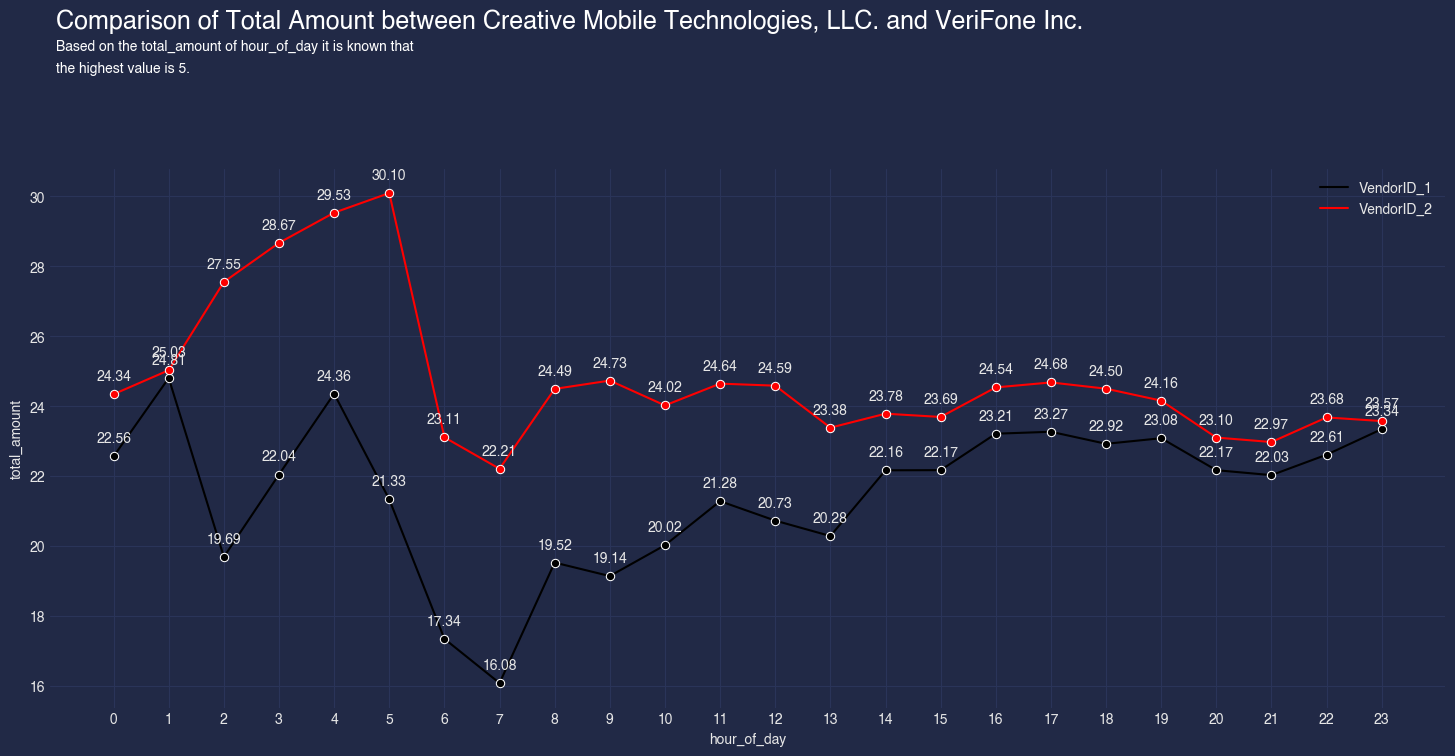

In [297]:
# Get the total passenger count for each hour of the day for VendorID_1
total_amount_VendorID_1 = df_VendorID_1.groupby('hour_of_day')['total_amount'].mean().reset_index()
total_amount_VendorID_1.rename(columns={'total_amount': 'VendorID_1'}, inplace=True)

# Get the total passenger count for each hour of the day for VendorID_2
total_amount_VendorID_2 = df_VendorID_2.groupby('hour_of_day')['total_amount'].mean().reset_index()
total_amount_VendorID_2.rename(columns={'total_amount': 'VendorID_2'}, inplace=True)

# Merge the two dataframes on the 'hour_of_day' column
comparison_df = pd.merge(total_amount_VendorID_1, total_amount_VendorID_2, on='hour_of_day')

# Set the figure size and plot the line chart with the custom color palette
plt.figure(figsize=(18, 7))
ax = sns.lineplot(x='hour_of_day', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['hour_of_day'], value_vars=['VendorID_1', 'VendorID_2']), palette={'VendorID_1': 'black', 'VendorID_2': 'red'}, marker='o')

# Add annotations for each data point
for _, row in comparison_df.iterrows():
    plt.annotate(f"{row['VendorID_1']:.2f}", (row['hour_of_day'], row['VendorID_1']), xytext=(0, 10), textcoords='offset points', ha='center')
    plt.annotate(f"{row['VendorID_2']:.2f}", (row['hour_of_day'], row['VendorID_2']), xytext=(0, 10), textcoords='offset points', ha='center')

# Add value labels to the x-axis
ax.set_xticks(comparison_df['hour_of_day'])
ax.set_xticklabels(comparison_df['hour_of_day'])

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Comparison of Total Amount between Creative Mobile Technologies, LLC. and VeriFone Inc.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the total_amount of hour_of_day it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.11, 
        fontsize=10, fontweight='light', 
        color='white')
plt.text(s="the highest value is 5.", 
        ha='left', x=xmin+0.1, y=ymax*1.09, 
        fontsize=10, fontweight='light', 
        color='white')

plt.xlabel('hour_of_day')
plt.ylabel('total_amount')
plt.legend()
plt.show()

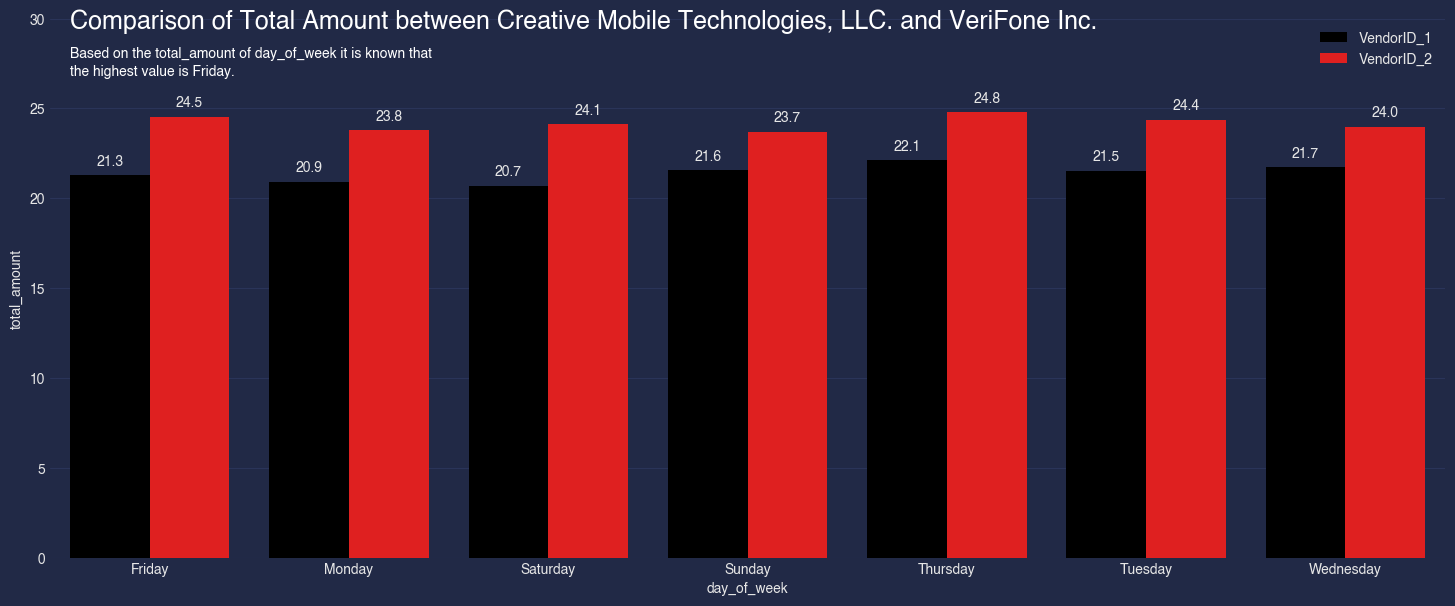

In [302]:
# Get the total passenger count for each hour of the day for VendorID_1
total_amount_VendorID_1 = df_VendorID_1.groupby('day_of_week')['total_amount'].mean().reset_index()
total_amount_VendorID_1.rename(columns={'total_amount': 'VendorID_1'}, inplace=True)

# Get the total passenger count for each hour of the day for VendorID_2
total_amount_VendorID_2 = df_VendorID_2.groupby('day_of_week')['total_amount'].mean().reset_index()
total_amount_VendorID_2.rename(columns={'total_amount': 'VendorID_2'}, inplace=True)

# Merge the two dataframes on the 'hour_of_day' column
comparison_df = pd.merge(total_amount_VendorID_1, total_amount_VendorID_2, on='day_of_week')

# Set the custom color palette with VendorID_1 bars in black aday_of_weeknd VendorID_2 bars in red
my_palette = sns.color_palette(['black', 'red'])

# Set the figure size and plot the bar chart with the custom color palette
plt.figure(figsize=(18, 7))

ax = sns.barplot(x='day_of_week', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['day_of_week'], value_vars=['VendorID_1', 'VendorID_2']), palette=my_palette)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Comparison of Total Amount between Creative Mobile Technologies, LLC. and VeriFone Inc.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the total_amount of day_of_week it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')
plt.text(s="the highest value is Friday.", 
        ha='left', x=xmin+0.1, y=ymax*1.03, 
        fontsize=10, fontweight='light', 
        color='white')

plt.xlabel('day_of_week')
plt.ylabel('total_amount')
plt.yticks([0, 5, 10, 15, 20, 25, 30])
plt.legend()
plt.show()

Penjelasan grafik ini adalah sebagai berikut:

1. Analisis Data:
   - Grafik ini menghitung rata-rata total_amount untuk setiap hari dalam seminggu, terpisah untuk VendorID_1 dan VendorID_2.
   - DataFrame `total_amount_VendorID_1` dan `total_amount_VendorID_2` dibuat dengan menggunakan metode `groupby` pada kolom 'day_of_week' dan kemudian menghitung rata-rata total_amount.
   - Hasilnya disimpan dalam DataFrame yang memiliki kolom 'day_of_week' dan 'VendorID_1' atau 'VendorID_2', masing-masing merepresentasikan rata-rata total_amount untuk VendorID_1 dan VendorID_2.

2. Visualisasi Grafik:
   - Grafik batang digunakan untuk memvisualisasikan perbandingan rata-rata total_amount antara VendorID_1 dan VendorID_2 pada setiap hari dalam seminggu.
   - Warna hitam ditetapkan untuk bar VendorID_1, sementara warna merah ditetapkan untuk bar VendorID_2.
   - DataFrame `comparison_df` diubah menjadi format yang sesuai untuk plotting menggunakan `pd.melt`.
   - Grafik batang menggunakan palet warna kustom dengan menggunakan `palette=my_palette`.
   - Label (nilai dari setiap batang) ditambahkan ke dalam grafik batang menggunakan `ax.annotate`, yang menampilkan nilai rata-rata total_amount di atas setiap batang.
   - Legenda ditampilkan dengan menggunakan `plt.legend()` untuk membedakan antara VendorID_1 dan VendorID_2.
   - Judul grafik "Comparison of Total Amount between Creative Mobile Technologies, LLC. and VeriFone Inc." memberikan konteks tentang data yang sedang dianalisis, yaitu perbandingan jumlah total_amount antara VendorID_1 (Creative Mobile Technologies, LLC.) dan VendorID_2 (VeriFone Inc.) pada setiap hari dalam seminggu.

Melalui analisis data dan visualisasi grafik ini, kita dapat membandingkan rata-rata total_amount antara VendorID_1 dan VendorID_2 pada setiap hari dalam seminggu. Grafik batang memberikan pemahaman yang visual tentang perbedaan rata-rata total_amount antara kedua VendorID tersebut pada setiap hari. Warna hitam dan merah digunakan untuk membedakan antara VendorID_1 dan VendorID_2. Dengan melihat grafik, kita dapat melihat perbedaan pola atau tren total_amount antara kedua VendorID selama periode waktu yang diteliti.Maka dari itu, VendorID_2 jauh lebih unggul berdasarkan total_amount dari day_of_week.

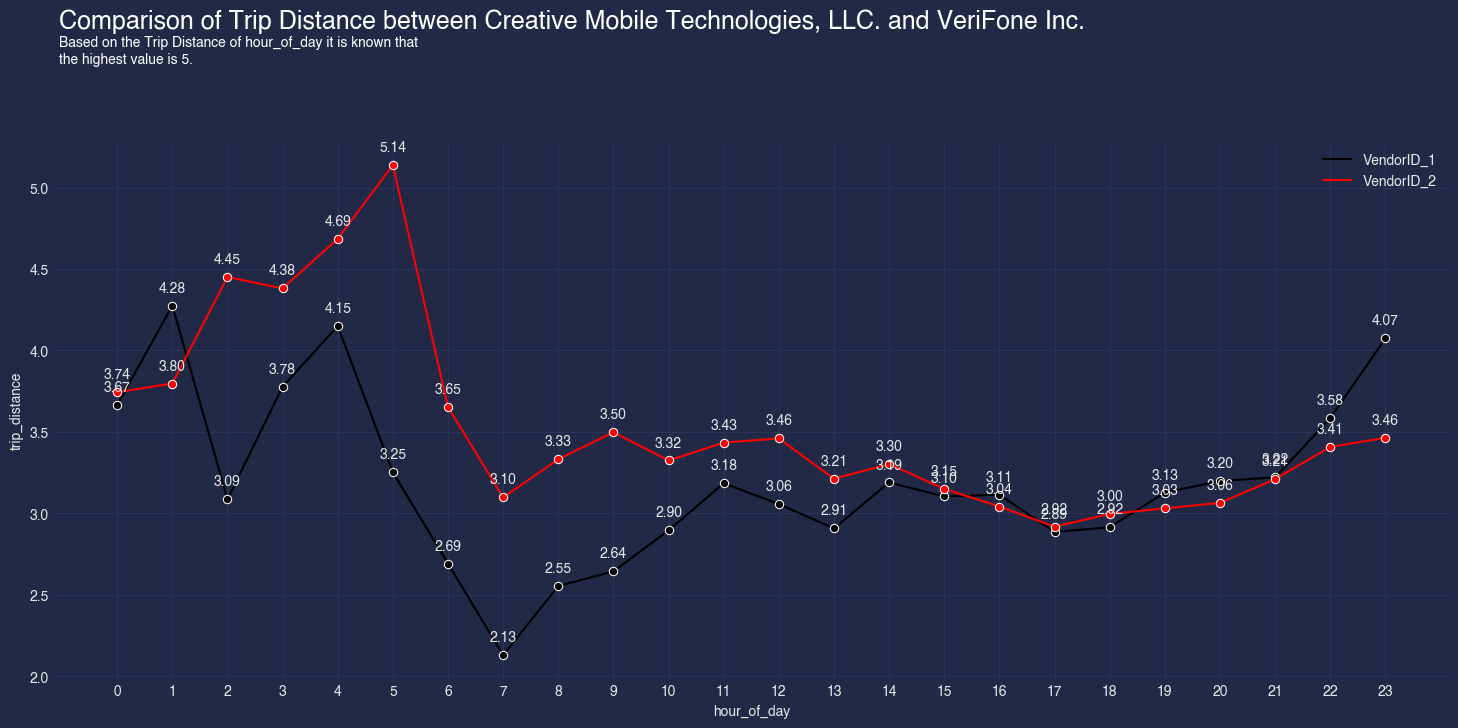

In [299]:
# Get the total passenger count for each hour of the day for VendorID_1
trip_distance_VendorID_1 = df_VendorID_1.groupby('hour_of_day')['trip_distance'].mean().reset_index()
trip_distance_VendorID_1.rename(columns={'trip_distance': 'VendorID_1'}, inplace=True)

# Get the total passenger count for each hour of the day for VendorID_2
trip_distance_VendorID_2 = df_VendorID_2.groupby('hour_of_day')['trip_distance'].mean().reset_index()
trip_distance_VendorID_2.rename(columns={'trip_distance': 'VendorID_2'}, inplace=True)

# Merge the two dataframes on the 'hour_of_day' column
comparison_df = pd.merge(trip_distance_VendorID_1, trip_distance_VendorID_2, on='hour_of_day')

# Set the figure size and plot the line chart with the custom color palette
plt.figure(figsize=(18, 7))
ax = sns.lineplot(x='hour_of_day', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['hour_of_day'], value_vars=['VendorID_1', 'VendorID_2']), palette={'VendorID_1': 'black', 'VendorID_2': 'red'}, marker='o')

# Add annotations for each data point
for _, row in comparison_df.iterrows():
    plt.annotate(f"{row['VendorID_1']:.2f}", (row['hour_of_day'], row['VendorID_1']), xytext=(0, 10), textcoords='offset points', ha='center')
    plt.annotate(f"{row['VendorID_2']:.2f}", (row['hour_of_day'], row['VendorID_2']), xytext=(0, 10), textcoords='offset points', ha='center')

# Add value labels to the x-axis
ax.set_xticks(comparison_df['hour_of_day'])
ax.set_xticklabels(comparison_df['hour_of_day'])

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Comparison of Trip Distance between Creative Mobile Technologies, LLC. and VeriFone Inc.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the Trip Distance of hour_of_day it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.11, 
        fontsize=10, fontweight='light', 
        color='white')

plt.text(s="the highest value is 5.", 
        ha='left', x=xmin+0.1, y=ymax*1.09, 
        fontsize=10, fontweight='light', 
        color='white')

plt.xlabel('hour_of_day')
plt.ylabel('trip_distance')
plt.legend()
plt.show()


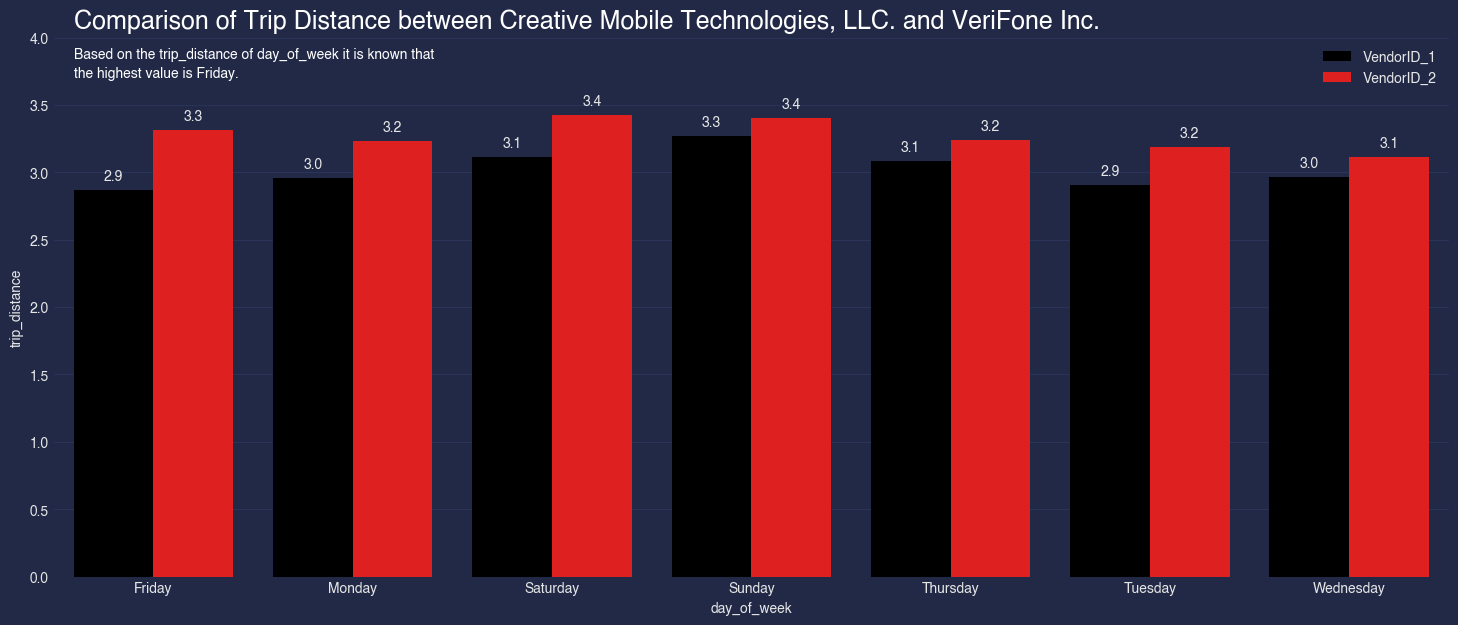

In [303]:
# Get the total passenger count for each hour of the day for VendorID_1
trip_distance_VendorID_1 = df_VendorID_1.groupby('day_of_week')['trip_distance'].mean().reset_index()
trip_distance_VendorID_1.rename(columns={'trip_distance': 'VendorID_1'}, inplace=True)

# Get the total passenger count for each hour of the day for VendorID_2
trip_distance_VendorID_2 = df_VendorID_2.groupby('day_of_week')['trip_distance'].mean().reset_index()
trip_distance_VendorID_2.rename(columns={'trip_distance': 'VendorID_2'}, inplace=True)

# Merge the two dataframes on the 'hour_of_day' column
comparison_df = pd.merge(trip_distance_VendorID_1, trip_distance_VendorID_2, on='day_of_week')

# Set the custom color palette with VendorID_1 bars in black aday_of_weeknd VendorID_2 bars in red
my_palette = sns.color_palette(['black', 'red'])

# Set the figure size and plot the bar chart with the custom color palette
plt.figure(figsize=(18, 7))

ax = sns.barplot(x='day_of_week', y='value', hue='variable', data=pd.melt(comparison_df, id_vars=['day_of_week'], value_vars=['VendorID_1', 'VendorID_2']), palette=my_palette)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

ax = plt.gca()
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

plt.text(s="Comparison of Trip Distance between Creative Mobile Technologies, LLC. and VeriFone Inc.", 
        ha='left', x=xmin+0.1, y=ymax*1.13, 
        fontsize=18, fontweight='bold', 
        color='white')

plt.text(s="Based on the trip_distance of day_of_week it is known that ", 
        ha='left', x=xmin+0.1, y=ymax*1.07, 
        fontsize=10, fontweight='light', 
        color='white')
plt.text(s="the highest value is Friday.", 
        ha='left', x=xmin+0.1, y=ymax*1.03, 
        fontsize=10, fontweight='light', 
        color='white')

plt.xlabel('day_of_week')
plt.ylabel('trip_distance')
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])
plt.legend()
plt.show()

Penjelasan grafik ini adalah sebagai berikut:

1. Analisis Data:
   - Grafik ini menghitung rata-rata trip_distance untuk setiap hari dalam seminggu, terpisah untuk VendorID_1 dan VendorID_2.
   - DataFrame `trip_distance_VendorID_1` dan `trip_distance_VendorID_2` dibuat dengan menggunakan metode `groupby` pada kolom 'day_of_week' dan kemudian menghitung rata-rata trip_distance.
   - Hasilnya disimpan dalam DataFrame yang memiliki kolom 'day_of_week' dan 'VendorID_1' atau 'VendorID_2', masing-masing merepresentasikan rata-rata trip_distance untuk VendorID_1 dan VendorID_2 pada setiap hari dalam seminggu.

2. Visualisasi Grafik:
   - Warna hitam ditetapkan untuk bar VendorID_1, sementara warna merah ditetapkan untuk bar VendorID_2.
   - Grafik batang digunakan untuk memvisualisasikan perbandingan rata-rata trip_distance antara VendorID_1 dan VendorID_2 pada setiap hari dalam seminggu.
   - DataFrame `comparison_df` diubah menjadi format yang sesuai untuk plotting menggunakan `pd.melt`.
   - Grafik batang menggunakan palet warna kustom dengan menggunakan `palette=my_palette`.
   - Label (nilai dari setiap batang) ditambahkan ke dalam grafik batang menggunakan `ax.annotate`, yang menampilkan nilai rata-rata trip_distance di atas setiap batang.
   - Legenda ditampilkan dengan menggunakan `plt.legend()` untuk membedakan antara VendorID_1 dan VendorID_2.
   - Judul grafik "Comparison of Trip Distance between Creative Mobile Technologies, LLC. and VeriFone Inc." memberikan konteks tentang data yang sedang dianalisis, yaitu perbandingan jarak perjalanan rata-rata antara VendorID_1 (Creative Mobile Technologies, LLC.) dan VendorID_2 (VeriFone Inc.) pada setiap hari dalam seminggu.

Melalui analisis data dan visualisasi grafik ini, kita dapat membandingkan rata-rata trip_distance antara VendorID_1 dan VendorID_2 pada setiap hari dalam seminggu. Grafik batang memberikan pemahaman yang visual tentang perbedaan rata-rata trip_distance antara kedua VendorID tersebut pada setiap hari. Warna hitam dan merah digunakan untuk membedakan antara VendorID_1 dan VendorID_2. Dengan melihat grafik, kita dapat melihat perbedaan pola atau tren trip_distance antara kedua VendorID selama periode waktu yang diteliti. Maka dari itu, VendorID_2 jauh lebih unggul berdasarkan trip_distance dari day_of_week.

In [301]:
top_passenger_count_VendorID_2_day_of_week.sort_values('passenger_count')


,day_of_week,passenger_count
6,Saturday,7785.0
5,Sunday,7988.0
4,Wednesday,8952.0
3,Monday,9218.0
2,Thursday,9303.0
1,Friday,9357.0
0,Tuesday,10226.0


# Kesimpulan dan Rekomendasi 

Dari analisis yang telah dilakukan, kita bisa membuat kesilpulan berikut tetang VendorID New York City TLC Trip Record Data Dictionary:

* VeriFone. (VendorID_2) paling unggul dibandingkan dengan Creative Mobile Technologies, LLC. (VendorID_1) berdasarkan, sebagai berikut: 

    1. passenger_count dari hour_of_day
    2. passenger_count dari day_of_week
    3. total_amount dari hour_of_day
    4. total_amount dari day_of_week
    5. trip_distance dari hour_of_day
    5. trip_distance dari day_of_week

* Kualitas (Performance) berdasarkan Creative Mobile Technologies, LLC. (VendorID_1), yaitu sebagai berikut:

    1. Dari passenger_count dari hour_of_day, menjelaskan bahwa pada jam-jam tertentu terdapat peningkatan kualitas pada passenger_count, yaitu jam 15 sebanyak 631.0 passenger_count, sedangkan terdapat penurunan kualitas passenger_count, yaitu jam 5 sebanyak 32.0 passenger_count.
    2. Dari passenger_count dari day_of_week, menjelaskan bahwa pada hari-hari tertentu terdapat peningkatan kualitas pada passenger_count, yaitu hari selasa (Tuesday) sebanyak 1,245 passenger_count, sedangkan terdapat penurunan kualitas passenger_count, yaitu hari sabtu (Saturday) sebanyak 885.0.
    3. Dari total_amount dari hour_of_day, menjelaskan bahwa pada jam-jam tertentu terdapat peningkatan kualitas pada total_amount, yaitu mulai jam 16 sebanyak 12,302.49 total_amount, sedangkan terdapat penurunan kualitas total_amount, yaitu jam 5 sebanyak 576.00 total_amount.
    4. Dari total_amount dari day_of_week, menjelaskan bahwa pada hari-hari tertentu terdapat peningkatan kualitas pada total_amount, yaitu hari selasa (Tuesday) sebanyak 24,235.76 total_amount, sedangkan terdapat penurunan kualitas passenger_count, yaitu hari sabtu (Saturday) sebanyak 15,909.27.
    5. Dari trip_distance dari hour_of_day, menjelaskan bahwa pada jam-jam tertentu terdapat peningkatan kualitas pada trip_distance, yaitu mulai jam 16 sebanyak 1,650.8 trip_distance, sedangkan terdapat penurunan kualitas trip_distance, yaitu jam 5 sebanyak 87.8 trip_distance.
    6. Dari trip_distance dari day_of_week, menjelaskan bahwa pada jam-jam tertentu terdapat peningkatan kualitas pada trip_distance, yaitu hari selasa (Tuesday) sebanyak 24,665.98 trip_distance, sedangkan terdapat penurunan kualitas trip_distance, yaitu hari sabtu (Saturday) sebanyak 2,394.6 trip_distance.

* Kualitas (Performance) berdasarkan VeriFone. (VendorID_2), yaitu sebagai berikut:

    1. Dari passenger_count dari hour_of_day, menjelaskan bahwa pada jam-jam tertentu terdapat peningkatan kualitas pada passenger_count, yaitu jam 18 sebanyak 5,083.0 passenger_count, sedangkan terdapat penurunan kualitas passenger_count, yaitu jam 5 sebanyak 460.0 passenger_count.
    2. Dari passenger_count dari day_of_week, menjelaskan bahwa pada hari-hari tertentu terdapat peningkatan kualitas pada passenger_count, yaitu hari selasa (Tuesday) sebanyak 10,226.0 passenger_count, sedangkan terdapat penurunan kualitas passenger_count, yaitu hari sabtu (Saturday) sebanyak 7785.0.
    3. Dari total_amount dari hour_of_day, menjelaskan bahwa pada jam-jam tertentu terdapat peningkatan kualitas pada total_amount, yaitu mulai jam 18 sebanyak 95,205.72 total_amount, sedangkan terdapat penurunan kualitas total_amount, yaitu jam 5 sebanyak 8938.49 total_amount.
    4. Dari total_amount dari day_of_week, menjelaskan bahwa pada hari-hari tertentu terdapat peningkatan kualitas pada total_amount, yaitu hari selasa (Tuesday) sebanyak 188,514.75 total_amount, sedangkan terdapat penurunan kualitas passenger_count, yaitu hari minggu (Sunday) sebanyak 141,581.38.
    5. Dari trip_distance dari hour_of_day, menjelaskan bahwa pada jam-jam tertentu terdapat peningkatan kualitas pada trip_distance, yaitu mulai jam 18 sebanyak 11643.62 trip_distance, sedangkan terdapat penurunan kualitas trip_distance, yaitu jam 5 sebanyak 1,525.87 trip_distance.
    6. Dari trip_distance dari day_of_week, menjelaskan bahwa pada jam-jam tertentu terdapat peningkatan kualitas pada trip_distance, yaitu hari selasa (Tuesday) sebanyak 3,268.4 trip_distance, sedangkan terdapat penurunan kualitas trip_distance, yaitu hari minggu (Sunday) sebanyak 20,331.27 trip_distance.




**Rekomendasi**
1. Dalam meningkatkan performance dari vendor VeriFone. (VendorID_2), sebaiknya jumlah vendor dari vendor VeriFone. (VendorID_2).
2. Diketahui bahwa pada Creative Mobile Technologies, LLC. (VendorID_1) memang jumlahnya lebih sedikit dibandingkan dengan VeriFone. (VendorID_2), maka dari itu sebaiknya Creative Mobile Technologies, LLC. (VendorID_1) lebih meningkatkan performanya berdasarkan passenger_count, total_amount dan trip_distance.
3. Memberikan preferensi kepada VeriFone (VendorID_2) sebagai pilihan vendor karena menunjukkan kinerja yang lebih baik dalam semua variabel yang diamati. Namun, keputusan akhir harus dipertimbangkan berdasarkan faktor-faktor lain yang relevan, seperti harga, layanan pelanggan, dan ulasan pengguna.

